In [1]:
!pip install graphviz

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score

# Arbol de Decision
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Importamos archivo desde Google Drive
#drive.mount('/content/drive')

ruta_archivo = "/content/dataset_proyecto_2.csv"
df = pd.read_csv(ruta_archivo)

## Análisis Exploratorio

In [4]:
# Visualizamos los primeros registros del dataset
print(df.head())

   edad  ingresos_anuales  cantidad_compras  valor_promedio_compra  \
0    28             90455                 4                    135   
1    35             55842                19                    367   
2    30             23268                39                    257   
3    35             60841                 8                    862   
4    25            100485                19                    444   

   frecuencia_compras_mensual dispositivo_utilizado     fuente_trafico  \
0                    0.921436                tablet     redes sociales   
1                    5.321630                 móvil  búsqueda orgánica   
2                    9.021315                 móvil  búsqueda orgánica   
3                    2.865878                 móvil  búsqueda orgánica   
4                    7.365862                 móvil     redes sociales   

   dias_desde_ultima_compra  valor_total_gastado  satisfaccion_cliente  \
0                       230                 3369            

In [ ]:
# Resumen general: columnas y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833331 entries, 0 to 1833330
Data columns (total 13 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   edad                            int64  
 1   ingresos_anuales                int64  
 2   cantidad_compras                int64  
 3   valor_promedio_compra           int64  
 4   frecuencia_compras_mensual      float64
 5   dispositivo_utilizado           object 
 6   fuente_trafico                  object 
 7   dias_desde_ultima_compra        int64  
 8   valor_total_gastado             int64  
 9   satisfaccion_cliente            float64
 10  metodo_pago                     object 
 11  participacion_programa_lealtad  int64  
 12  productos_adquiridos            object 
dtypes: float64(2), int64(7), object(4)
memory usage: 181.8+ MB


In [ ]:
# Verificamos la cantidad de valores nulos por columna
print(df.isnull().sum())

edad                              0
ingresos_anuales                  0
cantidad_compras                  0
valor_promedio_compra             0
frecuencia_compras_mensual        0
dispositivo_utilizado             0
fuente_trafico                    0
dias_desde_ultima_compra          0
valor_total_gastado               0
satisfaccion_cliente              0
metodo_pago                       0
participacion_programa_lealtad    0
productos_adquiridos              0
dtype: int64


In [ ]:
# Estadísticas del dataset
df.describe()

edad  ingresos_anuales  cantidad_compras  \
count  1.833331e+06      1.833331e+06      1.833331e+06   
mean   3.877552e+01      7.614756e+04      1.408932e+01   
std    1.358327e+01      4.419407e+04      1.182157e+01   
min    1.800000e+01      1.000000e+04      1.000000e+00   
25%    2.900000e+01      4.131500e+04      4.000000e+00   
50%    3.500000e+01      6.750700e+04      9.000000e+00   
75%    4.700000e+01      1.078480e+05      2.100000e+01   
max    6.900000e+01      1.999990e+05      4.900000e+01   

       valor_promedio_compra  frecuencia_compras_mensual  \
count           1.833331e+06                1.833331e+06   
mean            4.301820e+02                5.487638e+00   
std             3.086627e+02                4.209958e+00   
min             5.000000e+01                2.000125e-01   
25%             1.960000e+02                1.235148e+00   
50%             3.610000e+02                5.749663e+00   
75%             5.400000e+02                9.280341e+00   
max             1.499000e+03                1.499999e+01   

       dias_desde_ultima_compra  valor_total_gastado  satisfaccion_cliente  \
count              1.833331e+06         1.833331e+06          1.833331e+06   
mean               9.651723e+01         7.045614e+03          3.761349e+00   
std                1.065618e+02         6.204356e+03          7.281546e-01   
min                1.000000e+00         1.000000e+03          2.000002e+00   
25%                1.200000e+01         2.944000e+03          3.220253e+00   
50%                4.500000e+01         4.606000e+03          3.823675e+00   
75%                1.640000e+02         8.770000e+03          4.348068e+00   
max                3.640000e+02         2.999900e+04          5.000000e+00   

       participacion_programa_lealtad  
count                    1.833331e+06  
mean                     4.636860e-01  
std                      4.986797e-01  
min                      0.000000e+00  
25%                      0.000000e+00  
50%                      0.000000e+00  
75%                      1.000000e+00  
max                      1.000000e+00

### Identificaci´on de posibles valores at´ıpicos o inconsistencias

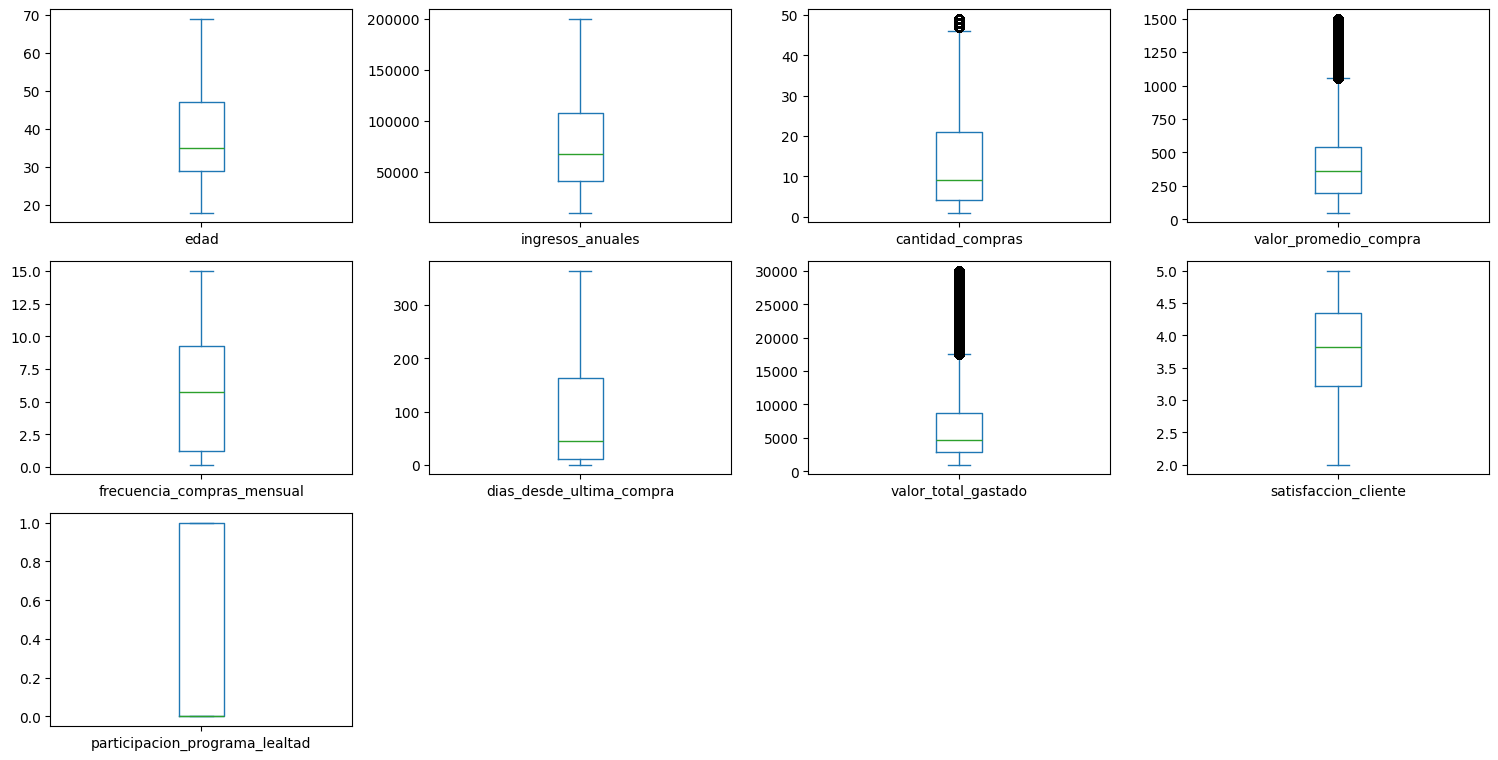

In [7]:
# Boxplots por columna
df.select_dtypes(include=['float64', 'int64']).plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


Las variables 'cantidad_compras', 'valor_promedio_compra' y 'valor_total_gastado' presentan una gran cantidad de valores atípicos hacia arriba (valores altos). Sin embargo, debido a la naturaleza del problema y la distribución de estas variables, no necesariamente se pueden considerar como errores. Estos valores podrían representar comportamientos legítimos de clientes con un gasto elevado o un mayor número de compras, lo cual es importante para el análisis.

                                    edad  ingresos_anuales  cantidad_compras  \
edad                            1.000000          0.106332         -0.361177   
ingresos_anuales                0.106332          1.000000          0.037307   
cantidad_compras               -0.361177          0.037307          1.000000   
valor_promedio_compra           0.317979          0.084797         -0.442071   
frecuencia_compras_mensual     -0.512957         -0.074933          0.821727   
dias_desde_ultima_compra        0.328617          0.216769         -0.635228   
valor_total_gastado             0.365983          0.224224         -0.371701   
satisfaccion_cliente           -0.461794         -0.323427          0.483399   
participacion_programa_lealtad  0.006395          0.181873          0.084285   

                                valor_promedio_compra  \
edad                                         0.317979   
ingresos_anuales                             0.084797   
cantidad_compras            

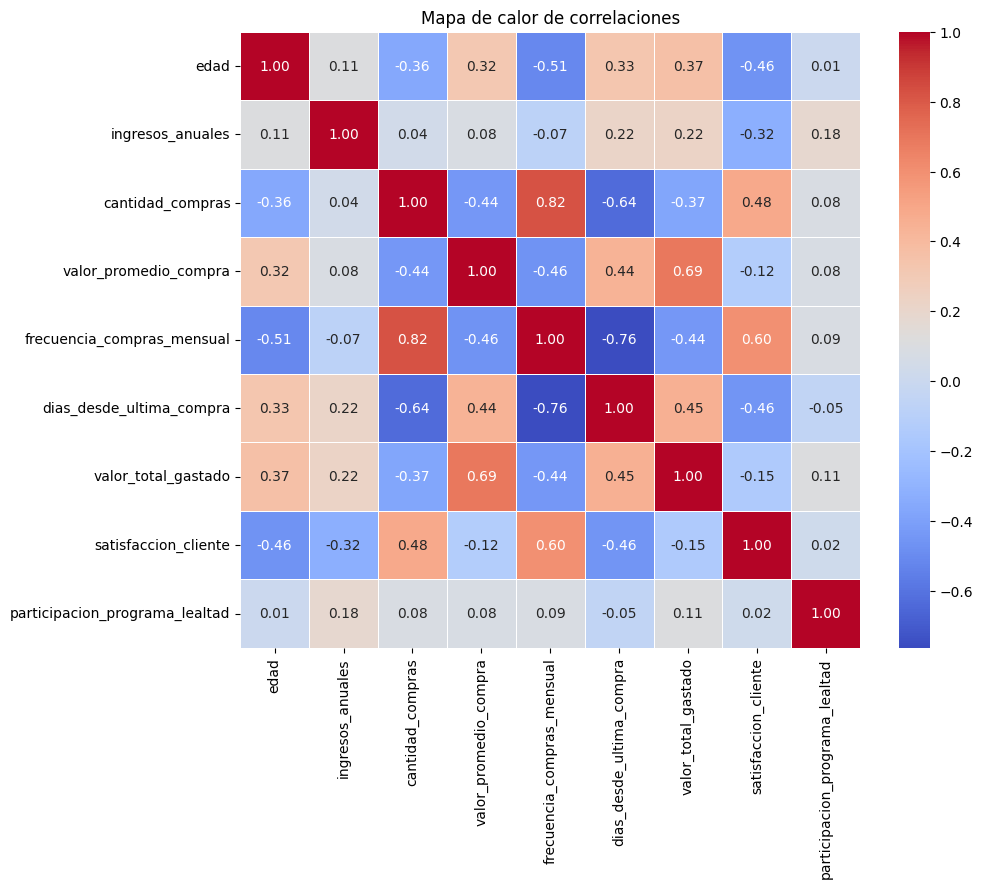

In [8]:
correlaciones = df.select_dtypes(include=['float64', 'int64']).corr()

print(correlaciones)

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

En el análisis realizado sobre las variables del conjunto de datos, se identificaron correlaciones significativas entre algunas de ellas. Por ejemplo, se encontró una alta correlación positiva entre frecuencia_compras_mensual y cantidad_compras (0.82), lo cual sugiere que estas variables podrían estar describiendo patrones similares de comportamiento. Asimismo, hubo una correlación considerable entre valor_promedio_compra y valor_total_gastado (0.69). Tambien notamos correlaciones negativas considerables entre la variable edad y las variables satisfaccion_cliente (-0.46) y frecuencia_compras_mensual (-0.51).

A pesar de las correlaciones significativas entre algunas variables, decidimos mantener todas en el análisis, incluso aquellas con alta correlación. Esto se debe a que cada variable podría aportar información única y relevante para la segmentación del modelo K-Means. Eliminar alguna de ellas podría resultar en una pérdida de detalles importantes que podrían enriquecer la calidad y la interpretación de los clusters generados.

## Preprocesamiento de Datos

In [9]:
df_procesado = df.copy()

### Transformación de variables numéricas (Normalización, Estandarización)

In [14]:

variables_numericas = df.select_dtypes(include=['float64', 'int64'])
variables_numericas = variables_numericas.drop(['participacion_programa_lealtad'], axis=1)

# Escalado estándar
scaler = StandardScaler()

for columna in variables_numericas:
    df_procesado[columna] = scaler.fit_transform(df[[columna]])

In [19]:
df_procesado.head()

edad  ingresos_anuales  cantidad_compras  valor_promedio_compra  \
0 -0.793294          0.323741         -0.853467              -0.956326   
1 -0.277954         -0.459464          0.415400              -0.204696   
2 -0.646054         -1.196531          2.107223              -0.561072   
3 -0.277954         -0.346349         -0.515103               1.398997   
4 -1.014154          0.550695          0.415400               0.044767   

   frecuencia_compras_mensual dispositivo_utilizado     fuente_trafico  \
0                   -1.084620                tablet     redes sociales   
1                   -0.039432                 móvil  búsqueda orgánica   
2                    0.839362                 móvil  búsqueda orgánica   
3                   -0.622752                 móvil  búsqueda orgánica   
4                    0.446139                 móvil     redes sociales   

   dias_desde_ultima_compra  valor_total_gastado  satisfaccion_cliente  \
0                  1.252633            -0.592586             -1.142011   
1                 -0.746208             0.198310             -0.432325   
2                 -0.783745            -0.778423              0.375742   
3                 -0.230075             0.154309             -0.404628   
4                 -0.370839             0.242473              0.753970   

       metodo_pago  participacion_programa_lealtad productos_adquiridos  
0  tarjeta crédito                               0         computadoras  
1  tarjeta crédito                               1           accesorios  
2  tarjeta crédito                               0           accesorios  
3           paypal                               0    electrodomésticos  
4           paypal                               1              móviles

### Codificación de variables categóricas.

In [20]:
df_categorico = df.select_dtypes(include=['object'])

In [24]:
# Verificar los valores únicos de las columnas categóricas
for columna in df_categorico:
    print(f"Valores únicos en '{columna}':")
    print(df_categorico[columna].unique())
    print("-" * 50)

Valores únicos en 'dispositivo_utilizado':
['tablet' 'móvil' 'PC']
--------------------------------------------------
Valores únicos en 'fuente_trafico':
['redes sociales' 'búsqueda orgánica' 'email']
--------------------------------------------------
Valores únicos en 'metodo_pago':
['tarjeta crédito' 'paypal' 'transferencia']
--------------------------------------------------
Valores únicos en 'productos_adquiridos':
['computadoras' 'accesorios' 'electrodomésticos' 'móviles']
--------------------------------------------------


In [22]:
# Variables categóricas a transformar
variables_categoricas = ['dispositivo_utilizado', 'fuente_trafico', 'metodo_pago', 'productos_adquiridos']

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
encoded = pd.DataFrame(encoder.fit_transform(df_procesado[variables_categoricas]),
                       columns=encoder.get_feature_names_out(variables_categoricas))

# Combinar el DataFrame codificado con el original
df_procesado = pd.concat([df_procesado.drop(variables_categoricas, axis=1), encoded], axis=1)

In [25]:
print(df_procesado.head())

       edad  ingresos_anuales  cantidad_compras  valor_promedio_compra  \
0 -0.793294          0.323741         -0.853467              -0.956326   
1 -0.277954         -0.459464          0.415400              -0.204696   
2 -0.646054         -1.196531          2.107223              -0.561072   
3 -0.277954         -0.346349         -0.515103               1.398997   
4 -1.014154          0.550695          0.415400               0.044767   

   frecuencia_compras_mensual  dias_desde_ultima_compra  valor_total_gastado  \
0                   -1.084620                  1.252633            -0.592586   
1                   -0.039432                 -0.746208             0.198310   
2                    0.839362                 -0.783745            -0.778423   
3                   -0.622752                 -0.230075             0.154309   
4                    0.446139                 -0.370839             0.242473   

   satisfaccion_cliente  participacion_programa_lealtad  \
0             -

In [26]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833331 entries, 0 to 1833330
Data columns (total 22 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   edad                                    float64
 1   ingresos_anuales                        float64
 2   cantidad_compras                        float64
 3   valor_promedio_compra                   float64
 4   frecuencia_compras_mensual              float64
 5   dias_desde_ultima_compra                float64
 6   valor_total_gastado                     float64
 7   satisfaccion_cliente                    float64
 8   participacion_programa_lealtad          int64  
 9   dispositivo_utilizado_PC                float64
 10  dispositivo_utilizado_móvil             float64
 11  dispositivo_utilizado_tablet            float64
 12  fuente_trafico_búsqueda orgánica        float64
 13  fuente_trafico_email                    float64
 14  fuente_trafico_redes sociales     

In [27]:
df_procesado.describe()

edad  ingresos_anuales  cantidad_compras  \
count  1.833331e+06      1.833331e+06      1.833331e+06   
mean   2.306812e-17      2.337818e-17      6.570074e-17   
std    1.000000e+00      1.000000e+00      1.000000e+00   
min   -1.529494e+00     -1.496752e+00     -1.107241e+00   
25%   -7.196739e-01     -7.881729e-01     -8.534673e-01   
50%   -2.779539e-01     -1.955140e-01     -4.305115e-01   
75%    6.054862e-01      7.173011e-01      5.845825e-01   
max    2.225126e+00      2.802446e+00      2.953135e+00   

       valor_promedio_compra  frecuencia_compras_mensual  \
count           1.833331e+06                1.833331e+06   
mean           -3.716014e-17                5.541930e-16   
std             1.000000e+00                1.000000e+00   
min            -1.231707e+00               -1.255981e+00   
25%            -7.586990e-01               -1.010103e+00   
50%            -2.241347e-01                6.223938e-02   
75%             3.557866e-01                9.008890e-01   
max             3.462739e+00                2.259490e+00   

       dias_desde_ultima_compra  valor_total_gastado  satisfaccion_cliente  \
count              1.833331e+06         1.833331e+06          1.833331e+06   
mean              -2.881965e-17         4.825237e-17         -2.341577e-15   
std                1.000000e+00         1.000000e+00          1.000000e+00   
min               -8.963553e-01        -9.744148e-01         -2.418920e+00   
25%               -7.931289e-01        -6.610864e-01         -7.431066e-01   
50%               -4.834494e-01        -3.932100e-01          8.559506e-02   
75%                6.332736e-01         2.779315e-01          8.057621e-01   
max                2.510119e+00         3.699561e+00          1.701083e+00   

       participacion_programa_lealtad  dispositivo_utilizado_PC  ...  \
count                    1.833331e+06              1.833331e+06  ...   
mean                     4.636860e-01              4.089676e-01  ...   
std                      4.986797e-01              4.916434e-01  ...   
min                      0.000000e+00              0.000000e+00  ...   
25%                      0.000000e+00              0.000000e+00  ...   
50%                      0.000000e+00              0.000000e+00  ...   
75%                      1.000000e+00              1.000000e+00  ...   
max                      1.000000e+00              1.000000e+00  ...   

       fuente_trafico_búsqueda orgánica  fuente_trafico_email  \
count                      1.833331e+06          1.833331e+06   
mean                       3.778445e-01          1.680826e-01   
std                        4.848486e-01          3.739397e-01   
min                        0.000000e+00          0.000000e+00   
25%                        0.000000e+00          0.000000e+00   
50%                        0.000000e+00          0.000000e+00   
75%                        1.000000e+00          0.000000e+00   
max                        1.000000e+00          1.000000e+00   

       fuente_trafico_redes sociales  metodo_pago_paypal  \
count                   1.833331e+06        1.833331e+06   
mean                    4.540729e-01        2.821182e-01   
std                     4.978864e-01        4.500307e-01   
min                     0.000000e+00        0.000000e+00   
25%                     0.000000e+00        0.000000e+00   
50%                     0.000000e+00        0.000000e+00   
75%                     1.000000e+00        1.000000e+00   
max                     1.000000e+00        1.000000e+00   

       metodo_pago_tarjeta crédito  metodo_pago_transferencia  \
count                 1.833331e+06               1.833331e+06   
mean                  5.039417e-01               2.139401e-01   
std                   4.999846e-01               4.100851e-01   
min                   0.000000e+00               0.000000e+00   
25%                   0.000000e+00               0.000000e+00   
50%                   1.000000e+00               0.000000e+00   
75%     

## K-Means

### Determinación del número de clusters

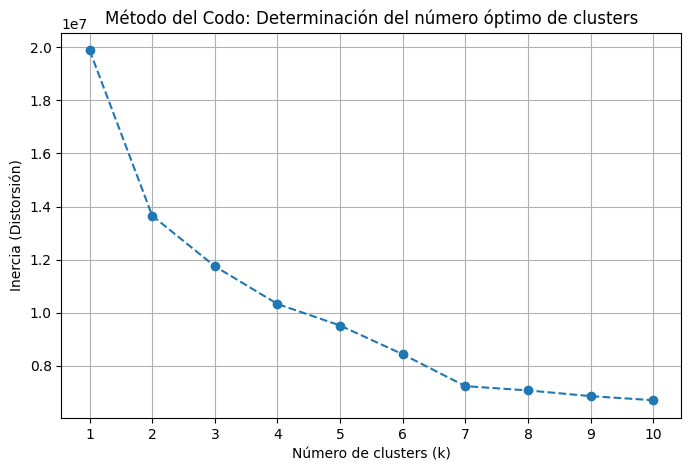

In [28]:
inercia = []

# Probamos diferentes números de clusters (k)
rango_clusters = range(1, 11)
for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_procesado)
    inercia.append(kmeans.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, inercia, marker='o', linestyle='--')
plt.title("Método del Codo: Determinación del número óptimo de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Distorsión)")
plt.xticks(rango_clusters)
plt.grid()
plt.show()

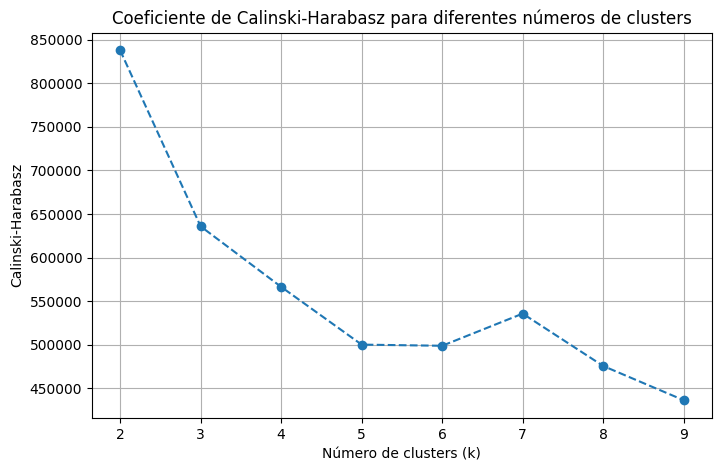

In [29]:
calinski_scores = []

# Probamos diferentes números de clusters (k)
rango_clusters = range(2, 10)
for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_procesado)
    score = calinski_harabasz_score(df_procesado, kmeans.labels_)
    calinski_scores.append(score)

# Graficamos el coeficiente de Calinski-Harabasz
plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, calinski_scores, marker='o', linestyle='--')
plt.title("Coeficiente de Calinski-Harabasz para diferentes números de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Calinski-Harabasz")
plt.grid()
plt.show()


Como se puede observar, tanto el método del codo como el coeficiente de Calinski-Harabasz coinciden en que el número óptimo de clusters para este análisis es 2.

### Aplicación de K-Means

In [30]:
# Aplicamos K-Means con k=2 al dataset
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_procesado)

# Asignar las etiquetas de los clusters al dataset original
df['cluster'] = kmeans.labels_

print("Datos con etiquetas de cluster asignadas:")
print(df.info())

Datos con etiquetas de cluster asignadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833331 entries, 0 to 1833330
Data columns (total 14 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   edad                            int64  
 1   ingresos_anuales                int64  
 2   cantidad_compras                int64  
 3   valor_promedio_compra           int64  
 4   frecuencia_compras_mensual      float64
 5   dispositivo_utilizado           object 
 6   fuente_trafico                  object 
 7   dias_desde_ultima_compra        int64  
 8   valor_total_gastado             int64  
 9   satisfaccion_cliente            float64
 10  metodo_pago                     object 
 11  participacion_programa_lealtad  int64  
 12  productos_adquiridos            object 
 13  cluster                         int32  
dtypes: float64(2), int32(1), int64(7), object(4)
memory usage: 188.8+ MB
None


### Visualización de los clusters

In [31]:
# Resumimos los datos por cada cluster
resumen_clusters = df.select_dtypes(include=['float64', 'int64', 'int32']).groupby('cluster').mean()

print("Resumen de los clusters:")
print(resumen_clusters)

Resumen de los clusters:
              edad  ingresos_anuales  cantidad_compras  valor_promedio_compra  \
cluster                                                                         
0        46.967232      79050.222721          4.527850             576.662124   
1        31.884531      73705.787291         22.132573             306.960703   

         frecuencia_compras_mensual  dias_desde_ultima_compra  \
cluster                                                         
0                          1.304011                189.250650   
1                          9.006967                 18.508475   

         valor_total_gastado  satisfaccion_cliente  \
cluster                                              
0               10090.161409              3.323486   
1                4484.495405              4.129686   

         participacion_programa_lealtad  
cluster                                  
0                              0.400835  
1                              0.516557  


<ipython-input-32-9fd313b01af0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=variable, data=df, palette='viridis', ax=axes[i])
<ipython-input-32-9fd313b01af0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=variable, data=df, palette='viridis', ax=axes[i])
<ipython-input-32-9fd313b01af0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=variable, data=df, palette='viridis', ax=axes[i])
<ipython-input-32-9fd313b01af0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

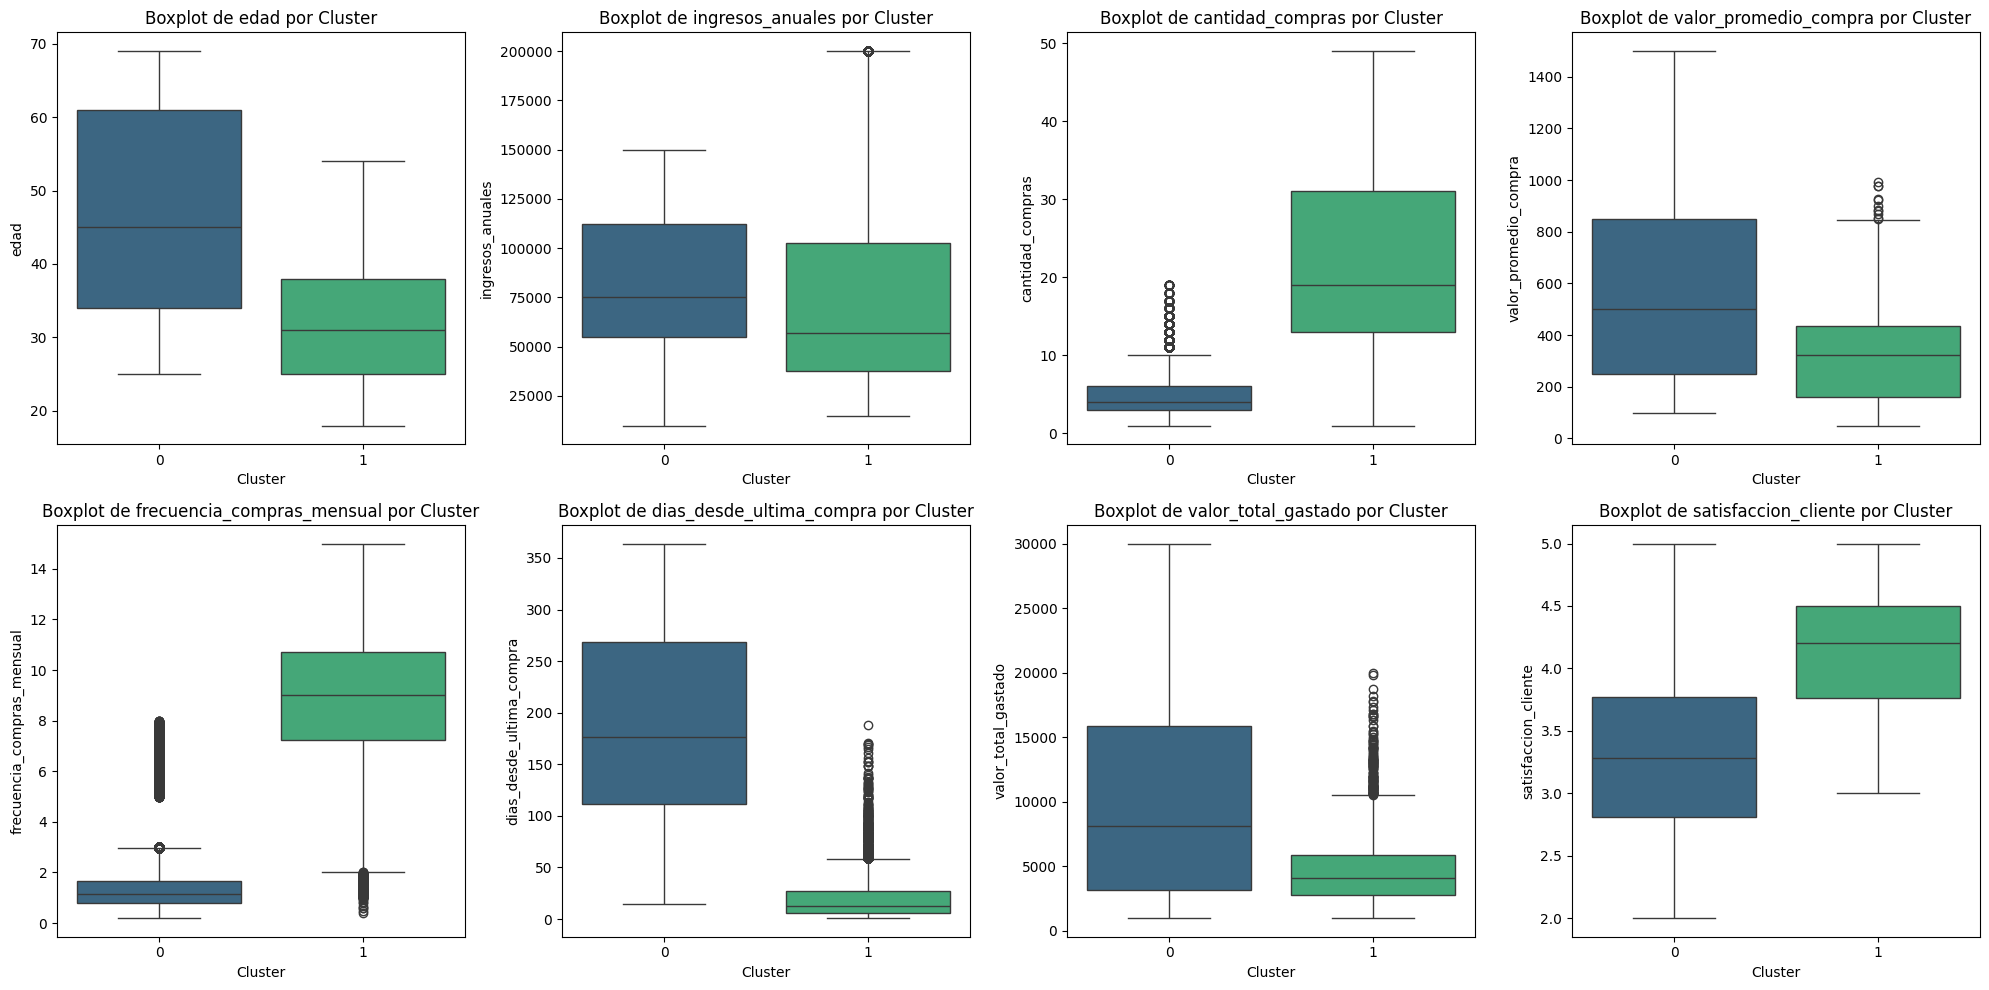

In [32]:
variables_numericas = ['edad', 'ingresos_anuales', 'cantidad_compras',
                       'valor_promedio_compra', 'frecuencia_compras_mensual',
                       'dias_desde_ultima_compra', 'valor_total_gastado',
                       'satisfaccion_cliente']

# Boxplots para variables numéricas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, variable in enumerate(variables_numericas):
    sns.boxplot(x='cluster', y=variable, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f"Boxplot de {variable} por Cluster")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(variable)

for j in range(len(variables_numericas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

El Cluster 0 está conformado principalmente por compradores jóvenes, con una edad promedio de 31.89 años. Este grupo tiene una frecuencia alta de compras, realizando aproximadamente 9 compras mensuales en promedio, lo que demuestra un comportamiento activo y comprometido con la marca. Aunque sus ingresos anuales son relativamente moderados en comparación con el otro grupo (73,707 en promedio), su cantidad total de compras (22.13) refleja un claro patrón de consumo enfocado en compras pequeñas pero constantes. Este tipo de cliente tiende a generar ingresos recurrentes debido a su regularidad, aunque el valor promedio por compra (306.99) es más bajo en comparación con otros segmentos.

Además, el Cluster 0 se caracteriza por su alta satisfacción (4.13 en promedio), lo que indica que tienen una percepción positiva de su experiencia con la marca. Este grupo también muestra una participación moderada en los programas de lealtad, con un 51.77% de inclusión en estos programas, lo cual refuerza la idea de que son clientes relativamente leales y comprometidos. Estos hallazgos sugieren que este segmento representa una base sólida de clientes frecuentes y satisfechos, con un importante potencial para ser fidelizados aún más a través de estrategias como descuentos regulares o promociones por volumen.

Por otro lado, el Cluster 1 incluye a compradores de mayor edad, con un promedio de 46.97 años, lo que podría reflejar un público más maduro y posiblemente con un mayor poder adquisitivo. Este grupo realiza compras con baja frecuencia (1.3 compras mensuales en promedio) y han pasado 189 días desde su última compra, lo que los posiciona como clientes más esporádicos en comparación con el Cluster 0. A pesar de esta menor frecuencia, el Cluster 1 destaca por su alto gasto total acumulado (10,090.49 en promedio) y un valor promedio por compra significativamente mayor ($576.66). Esto sugiere que este segmento tiende a realizar menos transacciones, pero estas son de alto valor, aportando significativamente a los ingresos totales.

En términos de satisfacción, este segmento se encuentra algo rezagado en comparación con el Cluster 0, con un promedio de 3.32, lo que podría ser un área de oportunidad para mejorar su experiencia y, potencialmente, su compromiso con la marca. Asimismo, su participación en los programas de lealtad es menor (39.95%), lo que indica que, aunque son clientes valiosos, no necesariamente tienen un fuerte vínculo con la marca.

En resumen, el Cluster 0 representa un perfil de compradores frecuentes, consistentes y jóvenes, mientras que el Cluster 1 está compuesto por clientes más maduros con hábitos de consumo menos frecuentes pero de mayor valor. Ambos clusters ofrecen oportunidades únicas: el primero puede beneficiarse de estrategias de retención y recompensas por fidelidad, mientras que el segundo podría responder a campañas personalizadas que refuercen la satisfacción y promuevan su participación en programas de lealtad. Estos enfoques permitirían maximizar el valor de cada grupo al tiempo que se fortalecen las relaciones con ambos segmentos.

In [33]:
# Lista de variables categóricas a analizar
variables_categoricas = ['dispositivo_utilizado', 'fuente_trafico',
                         'metodo_pago', 'participacion_programa_lealtad',
                         'productos_adquiridos']

# Crear un resumen de las variables categóricas por cluster
resumen_categorico = {}
for var in variables_categoricas:
    resumen_categorico[var] = df.groupby('cluster')[var].value_counts(normalize=True)

# Convertir a DataFrame para facilitar la lectura
for var, data in resumen_categorico.items():
    print(f"Distribución por cluster para {var}:\n")
    print(data.unstack())  # Desapila para una vista más clara
    print("\n")


Distribución por cluster para dispositivo_utilizado:

dispositivo_utilizado        PC     móvil    tablet
cluster                                            
0                      0.650003  0.119775  0.230222
1                      0.206205  0.719424  0.074371


Distribución por cluster para fuente_trafico:

fuente_trafico  búsqueda orgánica     email  redes sociales
cluster                                                    
0                        0.451990  0.367892        0.180118
1                        0.315472       NaN        0.684528


Distribución por cluster para metodo_pago:

metodo_pago    paypal  tarjeta crédito  transferencia
cluster                                              
0            0.101461         0.470328       0.428211
1            0.434090         0.532218       0.033692


Distribución por cluster para participacion_programa_lealtad:

participacion_programa_lealtad         0         1
cluster                                           
0                   

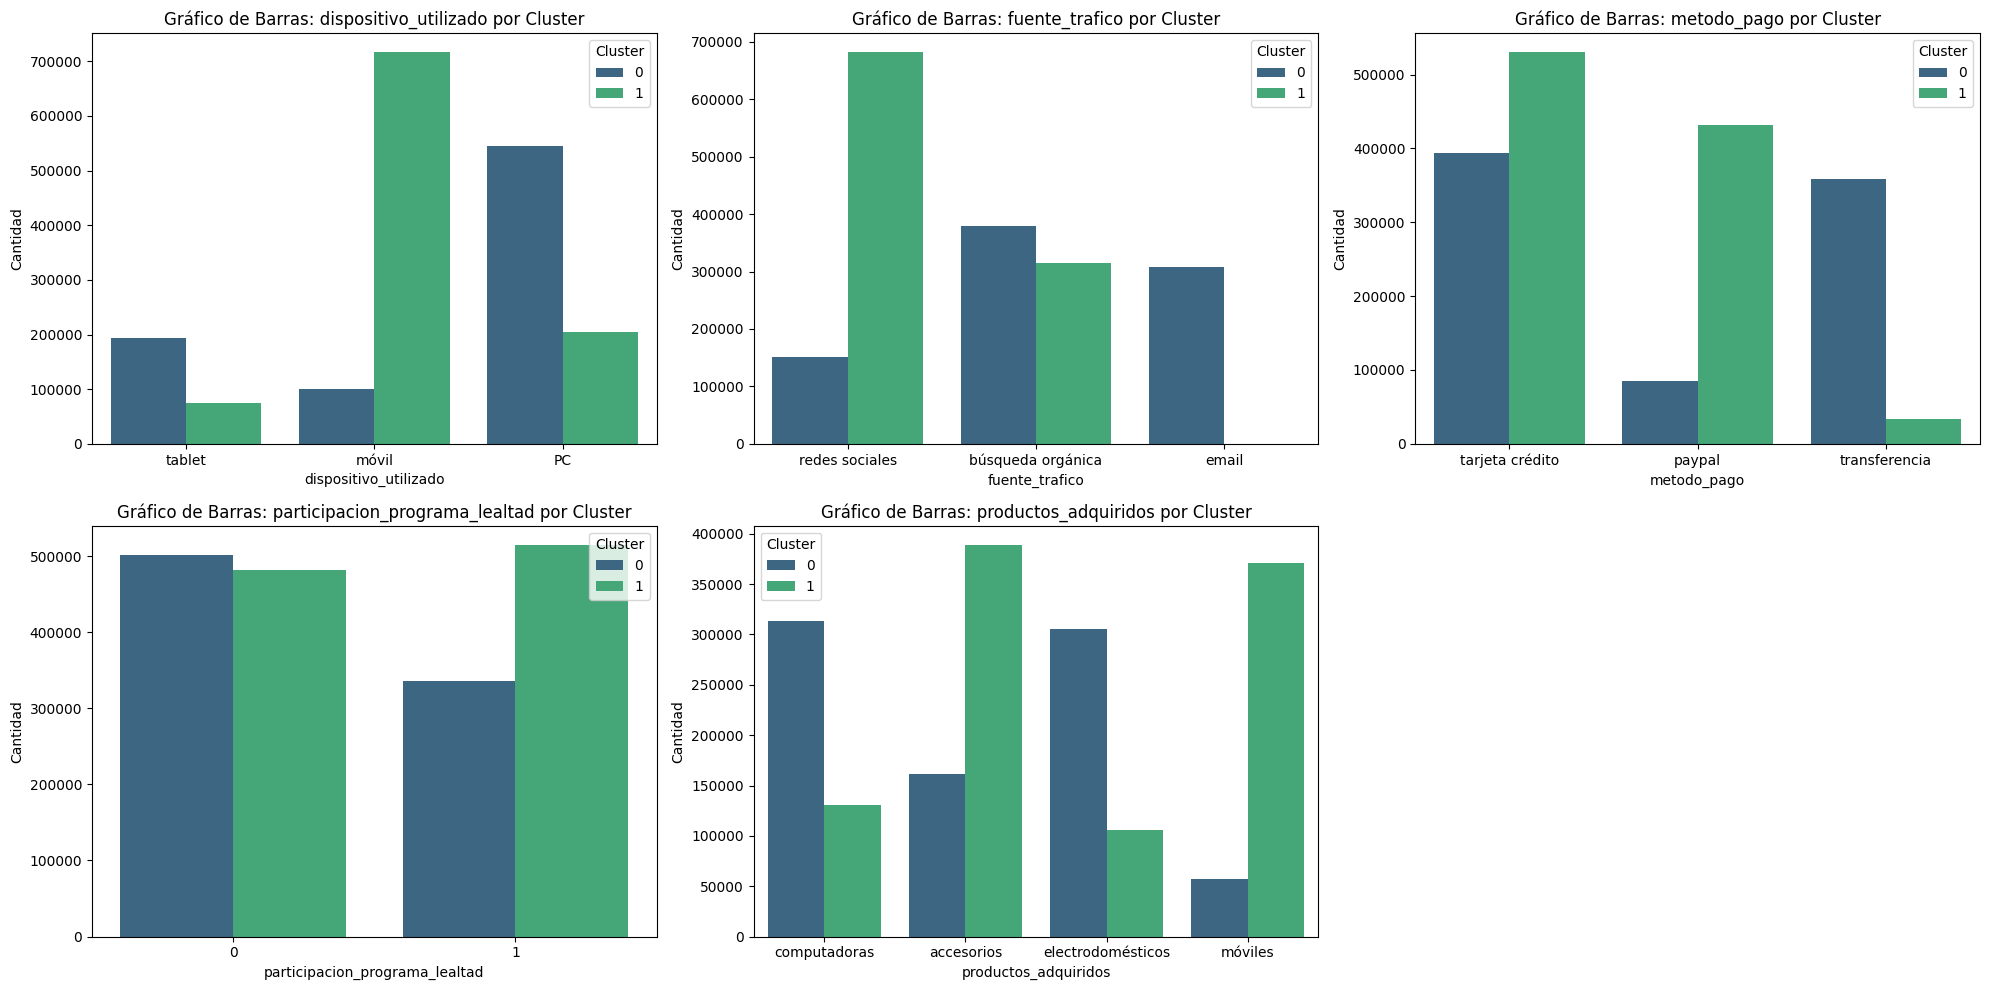

In [34]:
# Gráficos de barras para variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, variable in enumerate(variables_categoricas):
    sns.countplot(x=variable, hue='cluster', data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f"Gráfico de Barras: {variable} por Cluster")
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel("Cantidad")
    axes[i].legend(title="Cluster")

for j in range(len(variables_categoricas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


En términos de dispositivo utilizado, el Cluster 0 muestra una marcada preferencia por el uso de dispositivos móviles, representando más del 71% de las compras en este grupo. Esto refuerza la percepción de que estos compradores, más jóvenes y con una frecuencia alta de compras mensuales, priorizan la conveniencia y rapidez que ofrecen los dispositivos móviles. Este comportamiento está en línea con su perfil dinámico, caracterizado por un mayor nivel de interacción con la marca y una mayor actividad de compra. En contraste, el Cluster 1 está dominado por usuarios de PC (65%) y tabletas (23%), lo que sugiere un enfoque más metódico y tradicional en sus decisiones de compra. Estos clientes, al realizar compras de alto valor con menor frecuencia, parecen preferir interfaces más detalladas y seguras, posiblemente relacionadas con la naturaleza más planificada y reflexiva de sus transacciones.

Al analizar la fuente de tráfico, las diferencias entre ambos clusters son igualmente notables. El Cluster 0 tiende a interactuar principalmente a través de redes sociales (68%), lo cual es coherente con su perfil juvenil y digitalmente activo. Estas plataformas parecen ser un canal clave para captar su atención y fomentar su comportamiento recurrente. Por otro lado, el Cluster 1 muestra una mayor dependencia de búsquedas orgánicas (45%) y campañas de correo electrónico (37%), lo que refleja un proceso de compra más investigativo y un enfoque en la información previa a la decisión. La baja participación en redes sociales (18%) en este grupo indica una menor afinidad con estrategias de marketing digital directo, lo que sugiere que campañas de email marketing bien diseñadas podrían ser más efectivas para atraerlos.

En cuanto a los métodos de pago, los clientes del Cluster 0 utilizan predominantemente tarjetas de crédito (53%) y PayPal (43%), métodos asociados con la rapidez y facilidad en las transacciones. Esto se alinea con su alto volumen de compras y su preferencia por métodos ágiles que respalden su comportamiento frecuente. En contraste, el Cluster 1 muestra una mayor inclinación por transferencias bancarias (43%), seguido de tarjetas de crédito (47%), reflejando una preferencia por opciones de pago más tradicionales y seguras, especialmente considerando el valor significativamente mayor de sus compras. Este patrón está estrechamente relacionado con su perfil más maduro y cauteloso.

En términos de participación en programas de lealtad, el Cluster 0 presenta una mayor proporción de clientes inscritos (52%), lo que refuerza su compromiso con la marca y su predisposición a aprovechar beneficios continuos. Sin embargo, el Cluster 1, a pesar de su alto poder adquisitivo, tiene una participación menor (40%), lo que representa una oportunidad importante para fortalecer la conexión con este grupo. Dado su menor frecuencia de compra, incentivar su inclusión en estos programas podría fomentar una mayor lealtad y aumentar la recurrencia en sus transacciones.

Finalmente, los productos adquiridos reflejan aún más estas diferencias. En el Cluster 0, los productos principales incluyen accesorios (39%) y móviles (37%), categorías asociadas con un comportamiento de compra más frecuente, impulsado por tendencias o necesidades inmediatas. En contraste, el Cluster 1 se orienta hacia productos más costosos y menos frecuentes como computadoras (37%) y electrodomésticos (36%), lo que refuerza su perfil de cliente que valora transacciones significativas y planeadas. Esto también explica su menor satisfacción promedio, ya que las expectativas tienden a ser más altas cuando se realizan compras de mayor valor.

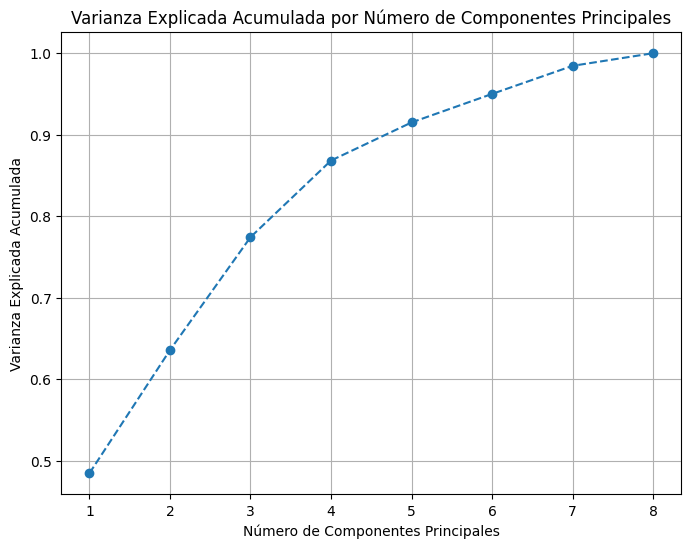

Número óptimo de componentes para explicar el 70% de la varianza: 3


In [35]:
df_procesado_numerico = df_procesado[variables_numericas]
# Aplicamos PCA a los datos
pca = PCA()
pca.fit(df_procesado_numerico)

# Calculamos la varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Gráfico de la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.title("Varianza Explicada Acumulada por Número de Componentes Principales")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.grid()
plt.show()

# Mostramos el número óptimo de componentes según el umbral de 0.7
umbral = 0.7
n_componentes_optimos = np.argmax(varianza_acumulada >= umbral) + 1
print(f"Número óptimo de componentes para explicar el {umbral*100:.0f}% de la varianza: {n_componentes_optimos}")


In [36]:
n_componentes_optimos = 3

# Reducimos el dataset utilizando el número óptimo de componentes
pca_final = PCA(n_components=n_componentes_optimos)
df_pca = pca_final.fit_transform(df_procesado_numerico)

# Creamos un DataFrame con las componentes principales y los clusters
df_pca_final = pd.DataFrame(data=df_pca, columns=[f'PCA{i+1}' for i in range(n_componentes_optimos)])
df_pca_final['cluster'] = df['cluster']

print(f"Dataset reducido a {n_componentes_optimos} componentes principales:")
print(df_pca_final.head())

Dataset reducido a 3 componentes principales:
       PCA1      PCA2      PCA3  cluster
0 -1.011159 -1.696858 -0.598087        0
1  0.466529 -0.050918 -0.158327        1
2  2.500490  0.156217 -0.343169        1
3 -0.924687  0.671526 -0.380181        0
4  0.934535  0.642992  0.740473        1


Cargas principales de las variables en las primeras 3 componentes principales:
                                PCA1      PCA2      PCA3
edad                       -0.317535 -0.127569  0.025025
ingresos_anuales           -0.122357 -0.278021  0.832238
cantidad_compras            0.410786  0.042569  0.368277
valor_promedio_compra      -0.334583  0.556876  0.122944
frecuencia_compras_mensual  0.460472  0.117541  0.235466
dias_desde_ultima_compra   -0.414255 -0.048320 -0.034634
valor_total_gastado        -0.335958  0.498862  0.309788
satisfaccion_cliente        0.327108  0.574015 -0.058295


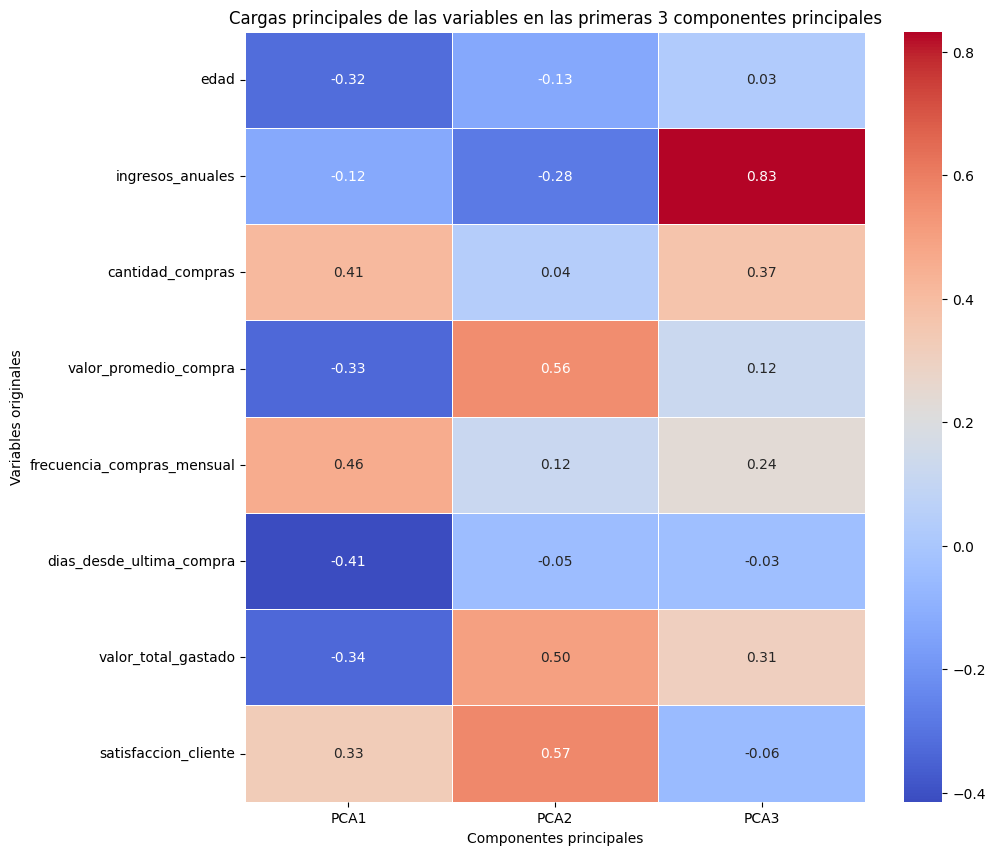

In [37]:
x_componentes = 3

cargas_principales = pd.DataFrame(pca.components_, columns=df_procesado_numerico.columns,
                                   index=[f'PCA{i+1}' for i in range(pca.n_components_)])
cargas_primeras_x = cargas_principales.iloc[:x_componentes, :]

cargas_primeras_x_t = cargas_primeras_x.T

print("Cargas principales de las variables en las primeras 3 componentes principales:")
print(cargas_primeras_x_t)

plt.figure(figsize=(10, 10))
sns.heatmap(cargas_primeras_x_t, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title(f"Cargas principales de las variables en las primeras {x_componentes} componentes principales")
plt.xlabel("Componentes principales")
plt.ylabel("Variables originales")
plt.show()



PCA1 (Frecuencia y recencia): Representa el comportamiento de compra reciente y frecuente de los clientes, diferenciando a aquellos que interactúan más activamente con la empresa frente a quienes tienen patrones menos recurrentes.

PCA2 (Satisfacción y valor económico): Refleja la relación entre la satisfacción del cliente y el valor financiero generado por sus compras, destacando a los clientes satisfechos que gastan más.

PCA3 (Capacidad económica): Captura principalmente la capacidad económica de los clientes, marcada por los ingresos anuales y su relación con el volumen de compras.

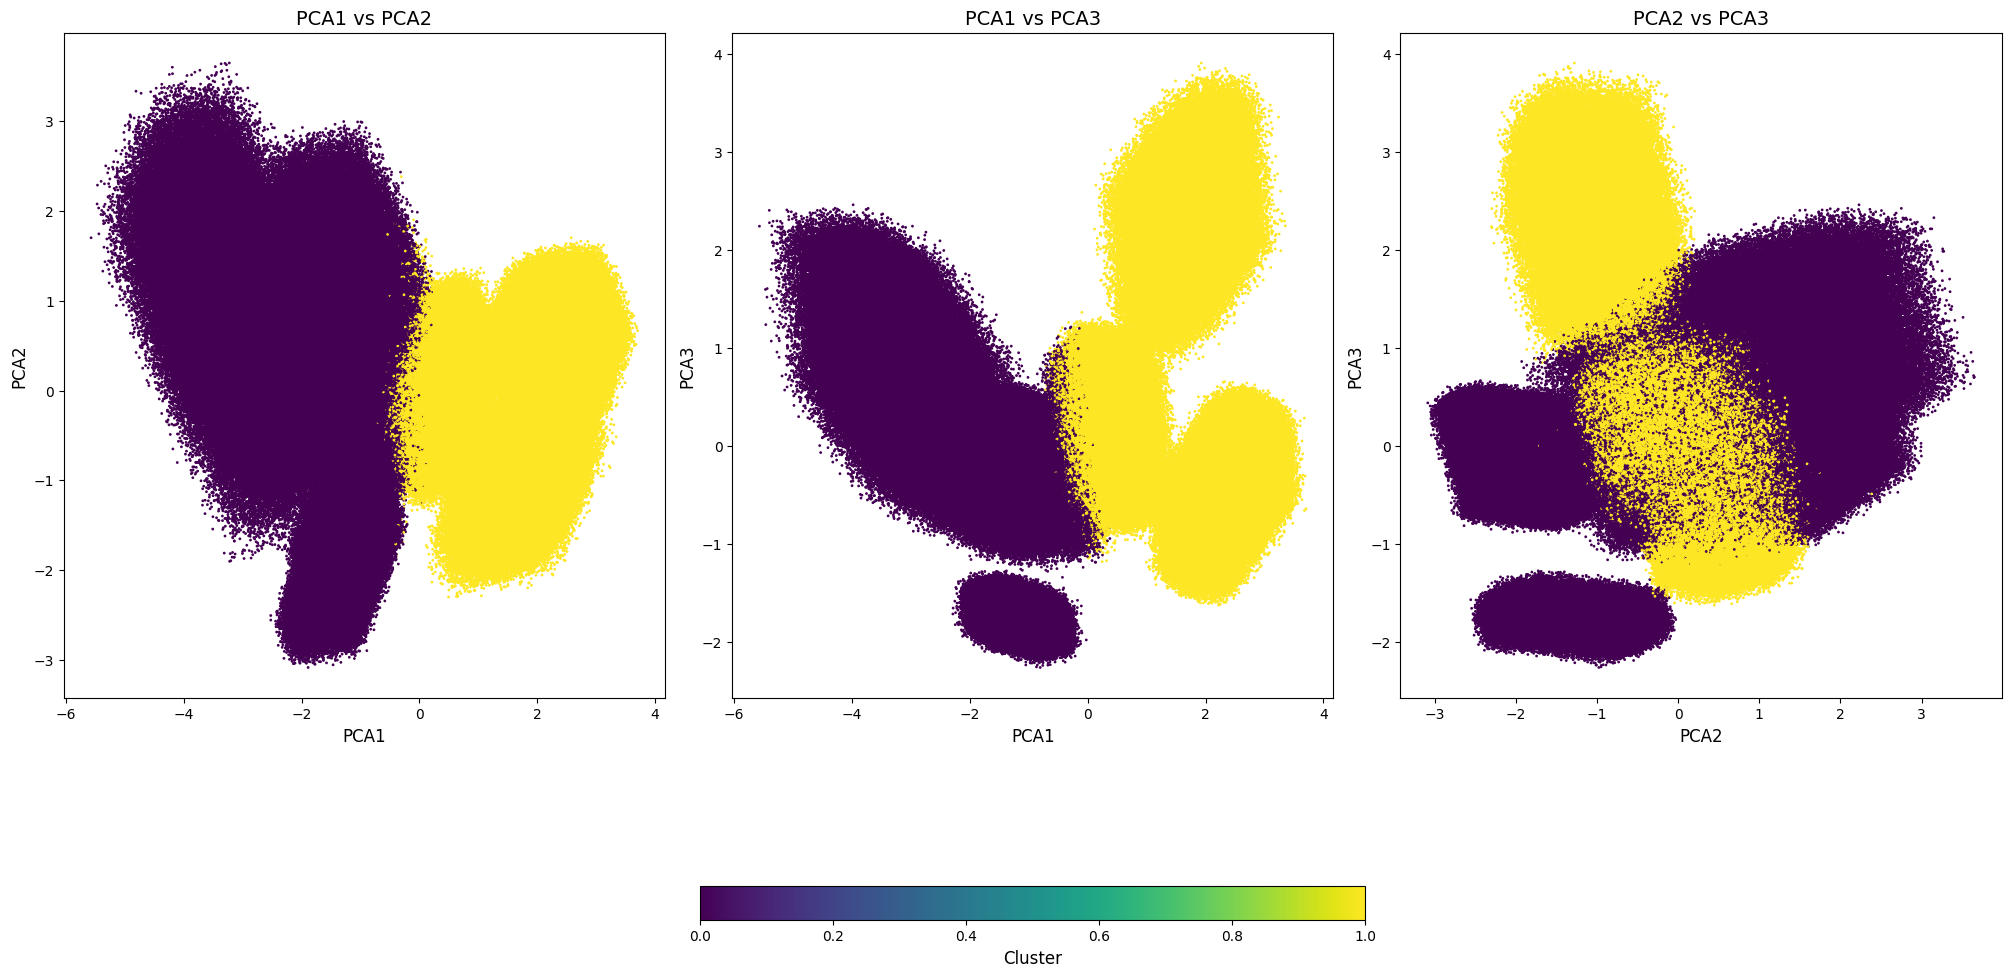

In [38]:
componentes = ['PCA1', 'PCA2', 'PCA3']

combinaciones = list(itertools.combinations(componentes, 2))

fig, axes = plt.subplots(1, len(combinaciones), figsize=(20, 10), constrained_layout=True)

for ax, (comp_x, comp_y) in zip(axes, combinaciones):

    scatter = ax.scatter(df_pca_final[comp_x], df_pca_final[comp_y],
                         c=df_pca_final['cluster'], cmap='viridis', s=1)

    ax.set_title(f"{comp_x} vs {comp_y}", fontsize=14)
    ax.set_xlabel(comp_x, fontsize=12)
    ax.set_ylabel(comp_y, fontsize=12)

cbar = fig.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.05, pad=0.2)
cbar.set_label('Cluster', fontsize=12)

plt.show()


## Arbol de Decisión

In [39]:
# Asignar las etiquetas de los clusters al dataset original
df_procesado['cluster'] = kmeans.labels_

print("Datos procesados con etiquetas de cluster asignadas:")
print(df_procesado.head(3))

Datos procesados con etiquetas de cluster asignadas:
       edad  ingresos_anuales  cantidad_compras  valor_promedio_compra  \
0 -0.793294          0.323741         -0.853467              -0.956326   
1 -0.277954         -0.459464          0.415400              -0.204696   
2 -0.646054         -1.196531          2.107223              -0.561072   

   frecuencia_compras_mensual  dias_desde_ultima_compra  valor_total_gastado  \
0                   -1.084620                  1.252633            -0.592586   
1                   -0.039432                 -0.746208             0.198310   
2                    0.839362                 -0.783745            -0.778423   

   satisfaccion_cliente  participacion_programa_lealtad  \
0             -1.142011                               0   
1             -0.432325                               1   
2              0.375742                               0   

   dispositivo_utilizado_PC  ...  fuente_trafico_email  \
0                       0.0  ...  

Distribución de los clusters:
cluster
1    0.54312
0    0.45688
Name: count, dtype: float64


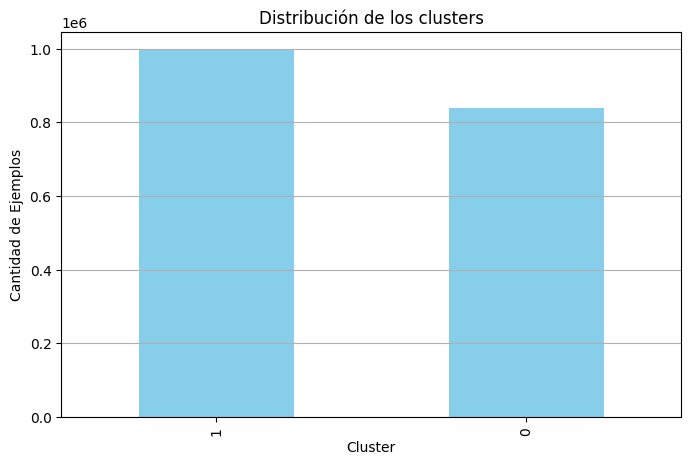

In [40]:
balance = df_procesado['cluster'].value_counts()

print("Distribución de los clusters:")
print(balance/df_procesado['cluster'].size)

# Graficar el balance de los datos
plt.figure(figsize=(8, 5))
balance.plot(kind='bar', color='skyblue')
plt.title("Distribución de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Ejemplos")
plt.grid(axis='y')
plt.show()

La distribución de datos en el conjunto es aproximadamente de 54% para la clase mayoritaria y 46% para la clase minoritaria, lo cual no representa un desbalance significativo. Por esta razón, no se considera necesario aplicar técnicas de ajuste adicionales, ya que la proporción es suficientemente equilibrada para garantizar un buen rendimiento del modelo en ambas clases.

### División de datos (Entrenamiento y Prueba)

In [41]:
X = df_procesado.drop(columns=['cluster'])
y = df_procesado['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Distribución en entrenamiento:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nDistribución en prueba:")
print(pd.Series(y_test).value_counts(normalize=True))

Distribución en entrenamiento:
cluster
1    0.542598
0    0.457402
Name: proportion, dtype: float64

Distribución en prueba:
cluster
1    0.544336
0    0.455664
Name: proportion, dtype: float64


### Elección de Hiperparámetros

Para optimizar el rendimiento del modelo, se utilizará GridSearchCV con el objetivo de encontrar los mejores hiperparámetros para el árbol de decisión. Esta técnica permite explorar combinaciones de parámetros, utilizando validación cruzada para evaluar el desempeño en diferentes subconjuntos de los datos. La métrica seleccionada para esta tarea es accuracy, ya que resulta adecuada en el contexto de segmentación de clientes tras la aplicación de SMOTE (no se verá sesgada por clases desbalanceadas). Accuracy mide la proporción de predicciones correctas y, en este caso, proporciona una visión clara y comprensible del rendimiento general del modelo al identificar correctamente los clusters, clave para desarrollar estrategias comerciales eficaces basadas en los segmentos detectados.

In [42]:
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train,
    test_size=0.9,
    stratify=y_train,
    random_state=42
)

Se decide extraer una muestra del conjunto de entrenamiento debido a las limitaciones de la máquina para procesar grandes volúmenes de información.

In [43]:
# Definir el modelo base
modelo = tree.DecisionTreeClassifier(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
parametros = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=modelo, param_grid=parametros, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_sample, y_sample)

# Mejor modelo
mejores_parametros = grid_search.best_params_
print("Mejores parámetros encontrados:", mejores_parametros)
print("Mejor precisión en validación cruzada:", grid_search.best_score_)

Mejores parámetros encontrados: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mejor precisión en validación cruzada: 0.9970623378637443


### Entrenamiento del modelo final con los mejores hiperparámetros

In [44]:
modelo_final = tree.DecisionTreeClassifier(**mejores_parametros, random_state=42)
modelo_final.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.231211 to fit



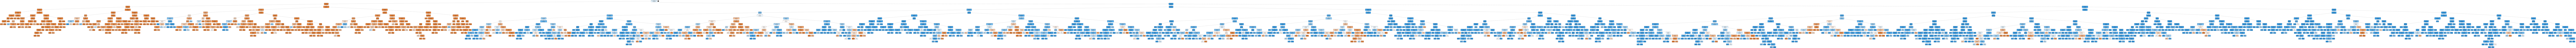

In [45]:
feature_names = X_train.columns

dot_data = export_graphviz(
    modelo_final,
    out_file=None,
    feature_names=feature_names,
    class_names=['Cluster 0', 'Cluster 1'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


### Evaluación del modelo en el conjunto de prueba

In [46]:
y_pred = modelo_final.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    250615
           1       1.00      1.00      1.00    299385

    accuracy                           1.00    550000
   macro avg       1.00      1.00      1.00    550000
weighted avg       1.00      1.00      1.00    550000

Precisión en el conjunto de prueba: 0.99746


In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.99746
Precision (macro): 0.9974526182130572
Recall (macro): 0.9974270325078634
F1-score (macro): 0.9974398042892549


## Sub-Clusters

In [48]:
df_procesado['cluster'] = kmeans.labels_
datos_cluster_menores = df_procesado[df_procesado['cluster'] == 0]
datos_cluster_menores = datos_cluster_menores.drop(columns=['cluster'])
df_menores = df[df['cluster'] == 0]

datos_cluster_mayores = df_procesado[df_procesado['cluster'] == 1]
datos_cluster_mayores = datos_cluster_mayores.drop(columns=['cluster'])
df_mayores = df[df['cluster'] == 1]

### Sub-Clusters de Menores

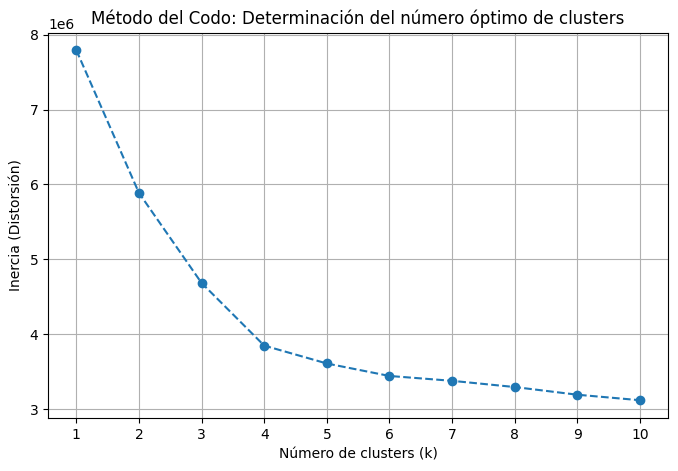

In [49]:
inercia = []

# Probamos diferentes números de clusters (k)
rango_clusters = range(1, 11)
for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_cluster_menores)
    inercia.append(kmeans.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, inercia, marker='o', linestyle='--')
plt.title("Método del Codo: Determinación del número óptimo de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Distorsión)")
plt.xticks(rango_clusters)
plt.grid()
plt.show()

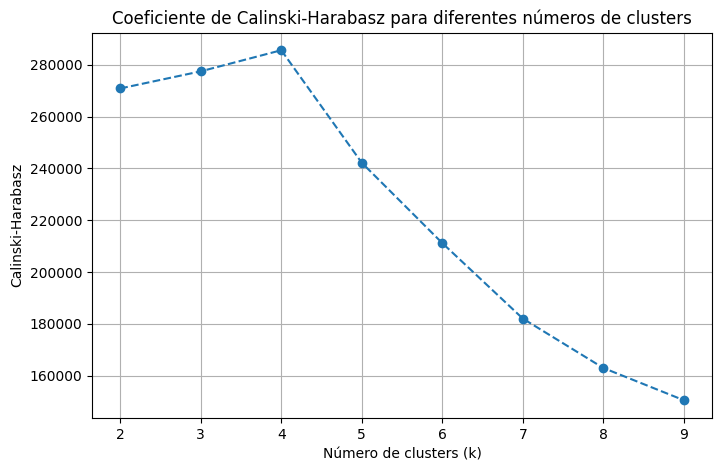

In [50]:
calinski_scores = []

# Probamos diferentes números de clusters (k)
rango_clusters = range(2, 10)
for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_cluster_menores)
    score = calinski_harabasz_score(datos_cluster_menores, kmeans.labels_)
    calinski_scores.append(score)

# Graficamos el coeficiente de Calinski-Harabasz
plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, calinski_scores, marker='o', linestyle='--')
plt.title("Coeficiente de Calinski-Harabasz para diferentes números de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Calinski-Harabasz")
plt.grid()
plt.show()

El k ideal segun el metodo del codo y el Calinski Score es 3.

In [51]:
# Aplicamos K-Means con k=3 al dataset
kmeans_menores = KMeans(n_clusters=3, random_state=42)
kmeans_menores.fit(datos_cluster_menores)

# Asignamos las etiquetas de los clusters al dataset original
df_menores['subcluster'] = kmeans_menores.labels_
datos_cluster_menores['subcluster'] = kmeans_menores.labels_

print("Datos con etiquetas de cluster asignadas:")
print(df_menores.info())

Datos con etiquetas de cluster asignadas:
<class 'pandas.core.frame.DataFrame'>
Index: 837613 entries, 0 to 1833330
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   edad                            837613 non-null  int64  
 1   ingresos_anuales                837613 non-null  int64  
 2   cantidad_compras                837613 non-null  int64  
 3   valor_promedio_compra           837613 non-null  int64  
 4   frecuencia_compras_mensual      837613 non-null  float64
 5   dispositivo_utilizado           837613 non-null  object 
 6   fuente_trafico                  837613 non-null  object 
 7   dias_desde_ultima_compra        837613 non-null  int64  
 8   valor_total_gastado             837613 non-null  int64  
 9   satisfaccion_cliente            837613 non-null  float64
 10  metodo_pago                     837613 non-null  object 
 11  participacion_programa_lealtad  837613 n

<ipython-input-51-2345484e7152>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_menores['subcluster'] = kmeans_menores.labels_


In [52]:
# Resumimos los datos por cada cluster
resumen_clusters = df_menores.select_dtypes(include=['float64', 'int64', 'int32']).groupby('subcluster').mean()

print("Resumen de los clusters:")
print(resumen_clusters)

Resumen de los clusters:
                 edad  ingresos_anuales  cantidad_compras  \
subcluster                                                  
0           46.993397      85173.388599          5.024726   
1           64.115654      21298.651933          5.026941   
2           29.699274     119174.552264          2.585182   

            valor_promedio_compra  frecuencia_compras_mensual  \
subcluster                                                      
0                      815.821619                    1.540936   
1                      254.918512                    1.276542   
2                      205.003098                    0.643818   

            dias_desde_ultima_compra  valor_total_gastado  \
subcluster                                                  
0                         204.084628         15083.869047   
1                         104.217786          3102.468226   
2                         231.440298          2600.126373   

            satisfaccion_cliente  par

<ipython-input-53-1a02927918d9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subcluster', y=variable, data=df_menores, palette='viridis', ax=axes[i])
<ipython-input-53-1a02927918d9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subcluster', y=variable, data=df_menores, palette='viridis', ax=axes[i])
<ipython-input-53-1a02927918d9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subcluster', y=variable, data=df_menores, palette='viridis', ax=axes[i])
<ipython-input-53-1a02927918d9>:11: FutureWarning: 

Passing `palette` wi

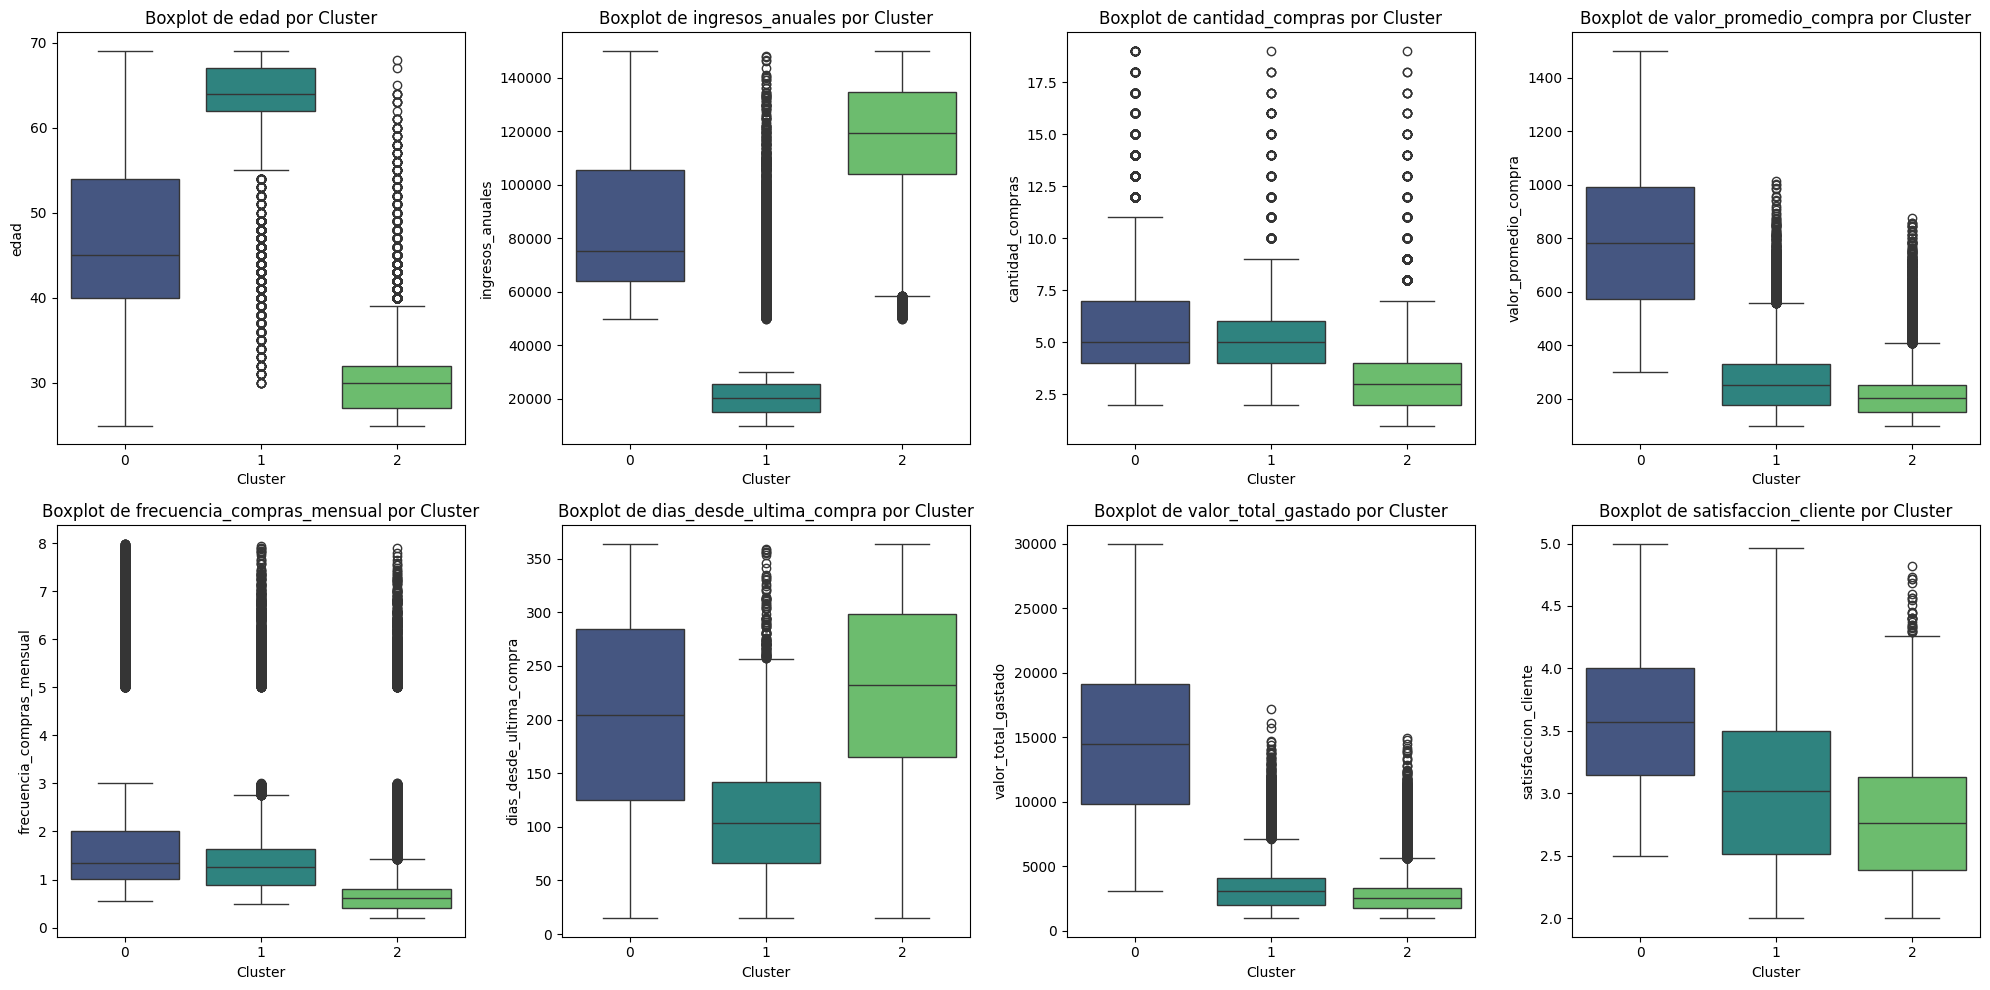

In [53]:
variables_numericas = ['edad', 'ingresos_anuales', 'cantidad_compras',
                       'valor_promedio_compra', 'frecuencia_compras_mensual',
                       'dias_desde_ultima_compra', 'valor_total_gastado',
                       'satisfaccion_cliente']

# Boxplots para variables numéricas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, variable in enumerate(variables_numericas):
    sns.boxplot(x='subcluster', y=variable, data=df_menores, palette='viridis', ax=axes[i])
    axes[i].set_title(f"Boxplot de {variable} por Cluster")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(variable)

for j in range(len(variables_numericas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [54]:
# Lista de variables categóricas a analizar
variables_categoricas = ['dispositivo_utilizado', 'fuente_trafico',
                         'metodo_pago', 'participacion_programa_lealtad',
                         'productos_adquiridos']

# Crear un resumen de las variables categóricas por cluster
resumen_categorico = {}
for var in variables_categoricas:
    resumen_categorico[var] = df_menores.groupby('subcluster')[var].value_counts(normalize=True)

# Convertir a DataFrame para facilitar la lectura
for var, data in resumen_categorico.items():
    print(f"Distribución por cluster para {var}:\n")
    print(data.unstack())  # Desapila para una vista más clara
    print("\n")

Distribución por cluster para dispositivo_utilizado:

dispositivo_utilizado        PC     móvil    tablet
subcluster                                         
0                      0.749855  0.099775  0.150370
1                      0.699832  0.002354  0.297814
2                      0.310201  0.295549  0.394250


Distribución por cluster para fuente_trafico:

fuente_trafico  búsqueda orgánica     email  redes sociales
subcluster                                                 
0                        0.552641  0.348526        0.098833
1                        0.602134  0.395067        0.002798
2                        0.009300  0.396862        0.593838


Distribución por cluster para metodo_pago:

metodo_pago    paypal  tarjeta crédito  transferencia
subcluster                                           
0            0.168366         0.416719       0.414915
1            0.004843         0.399554       0.595604
2            0.004117         0.696897       0.298986


Distribución por cl

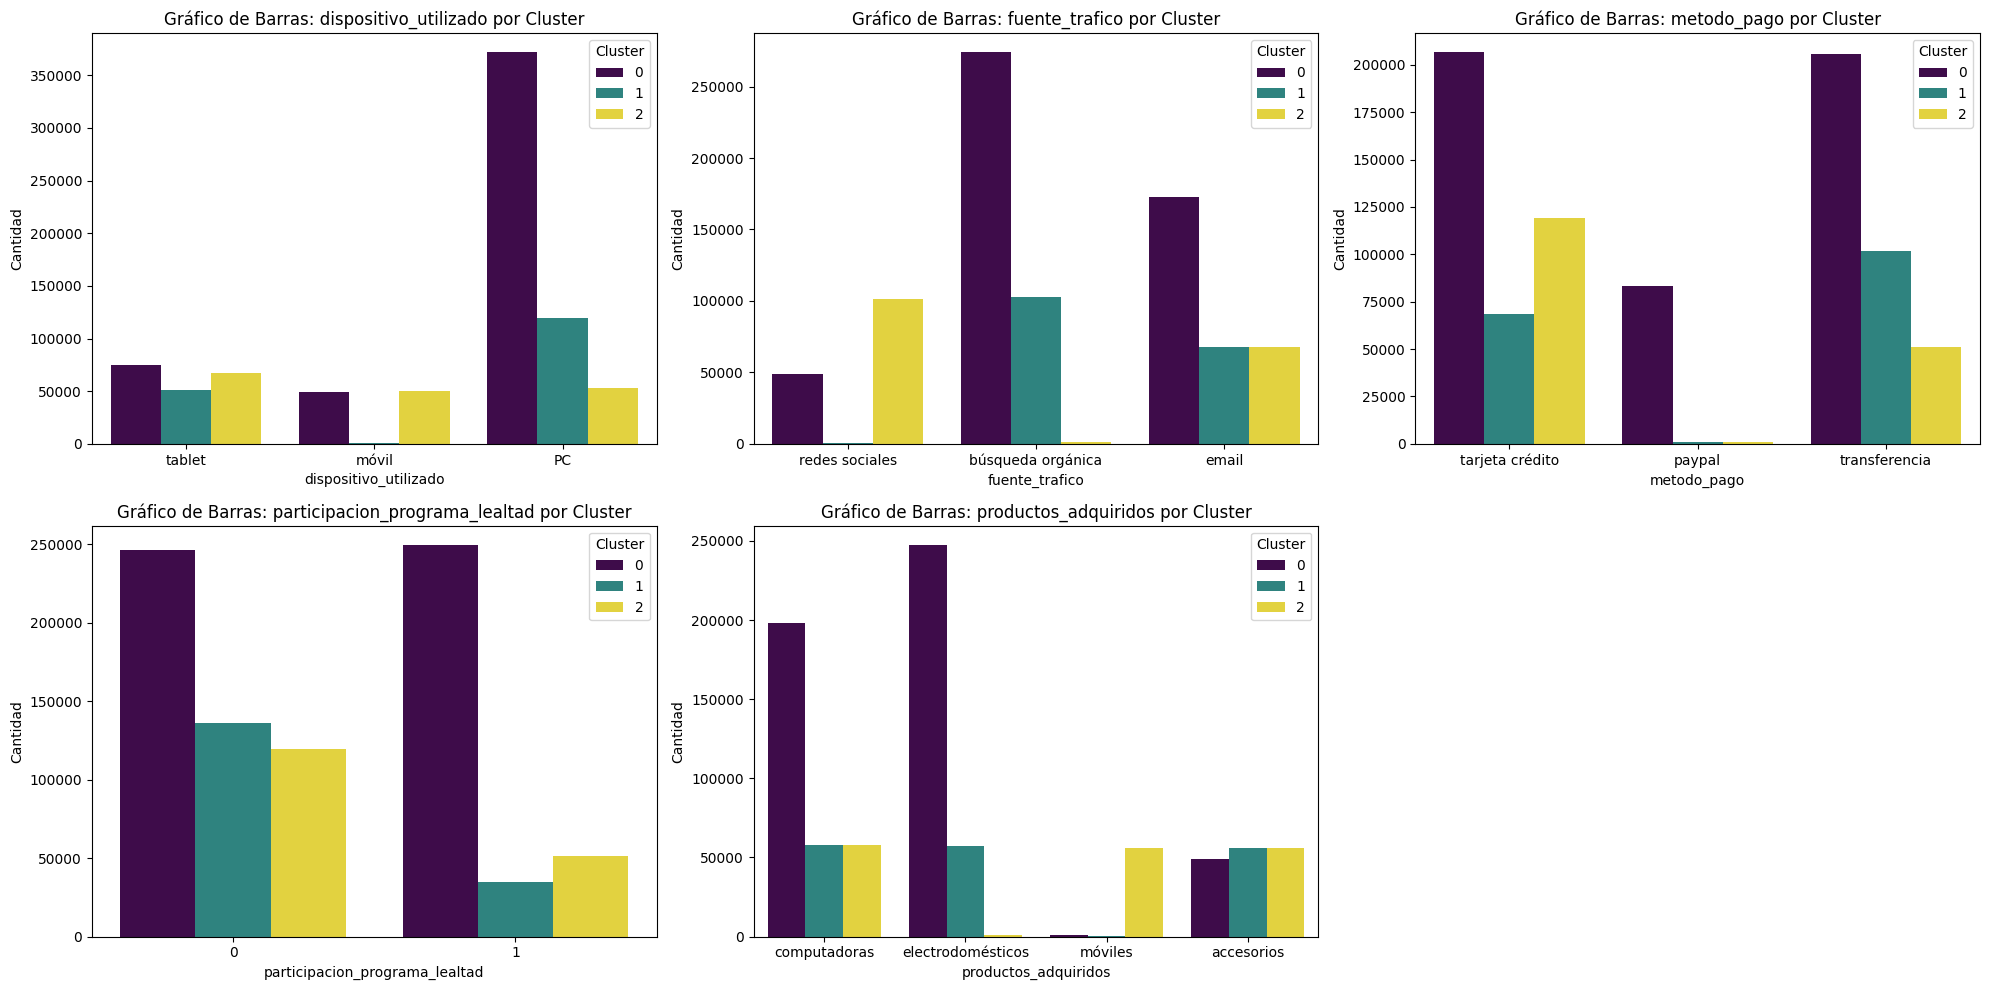

In [55]:
# Gráficos de barras para variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, variable in enumerate(variables_categoricas):
    sns.countplot(x=variable, hue='subcluster', data=df_menores, palette='viridis', ax=axes[i])
    axes[i].set_title(f"Gráfico de Barras: {variable} por Cluster")
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel("Cantidad")
    axes[i].legend(title="Cluster")

for j in range(len(variables_categoricas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Los subclusters dentro del Cluster 0 presentan características diferenciadas que permiten entender mejor los perfiles de estos consumidores. El Subcluster 0 se compone principalmente de personas jóvenes con ingresos anuales relativamente bajos. Su comportamiento de compra es marcado por una alta frecuencia mensual y transacciones de valor moderado. Este grupo tiene una clara inclinación por el uso de dispositivos móviles y redes sociales, reflejando su perfil dinámico y su preferencia por la rapidez y conveniencia. Los productos más adquiridos son accesorios y móviles, lo cual está alineado con su estilo de vida digital. Sin embargo, su participación en programas de lealtad es baja, lo que podría representar una oportunidad para fidelizar aún más a estos compradores recurrentes.

El Subcluster 1 está compuesto por individuos adultos jóvenes con ingresos medios-altos. Aunque realizan compras menos frecuentes, el valor promedio por transacción es notablemente alto, lo que indica un enfoque más reflexivo y planificado. Este grupo diversifica su uso entre móviles y tabletas, mostrando un perfil más sofisticado en términos tecnológicos. Además, aunque redes sociales siguen siendo relevantes, hay una mayor proporción de interacción a través de búsquedas orgánicas. Los productos que destacan son móviles y computadoras, reflejando la preferencia por bienes de mayor valor. La satisfacción del cliente en este grupo es moderada, pero su participación en programas de lealtad es considerablemente alta, lo cual sugiere que las estrategias de fidelización pueden ser particularmente efectivas para este perfil.

Por último, el Subcluster 2 se caracteriza por un perfil más maduro y con ingresos altos. A pesar de ser el grupo con mayor frecuencia de compras mensuales, el valor promedio de sus transacciones es bajo, lo que podría reflejar interés en compras recurrentes de menor valor. Este subcluster utiliza una mezcla equilibrada de dispositivos como móviles, PC y tabletas, lo que denota flexibilidad tecnológica. En términos de tráfico, este grupo muestra igual interés por redes sociales y búsquedas orgánicas, lo que abre oportunidades para estrategias híbridas de marketing. Los productos adquiridos están distribuidos equitativamente entre accesorios, electrodomésticos y móviles, reflejando una preferencia diversificada. Aunque la satisfacción promedio es moderada, la participación en programas de lealtad es alta, lo cual fortalece su vínculo con la marca.

### Sub-Clusters de Mayores

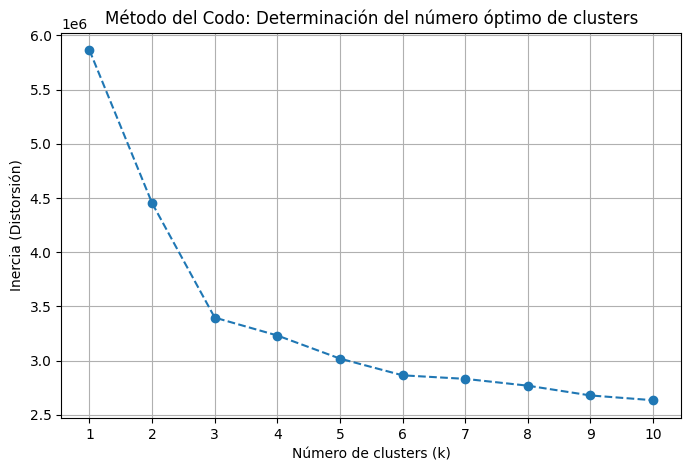

In [56]:
inercia = []

# Probamos diferentes números de clusters (k)
rango_clusters = range(1, 11)
for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_cluster_mayores)
    inercia.append(kmeans.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, inercia, marker='o', linestyle='--')
plt.title("Método del Codo: Determinación del número óptimo de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Distorsión)")
plt.xticks(rango_clusters)
plt.grid()
plt.show()

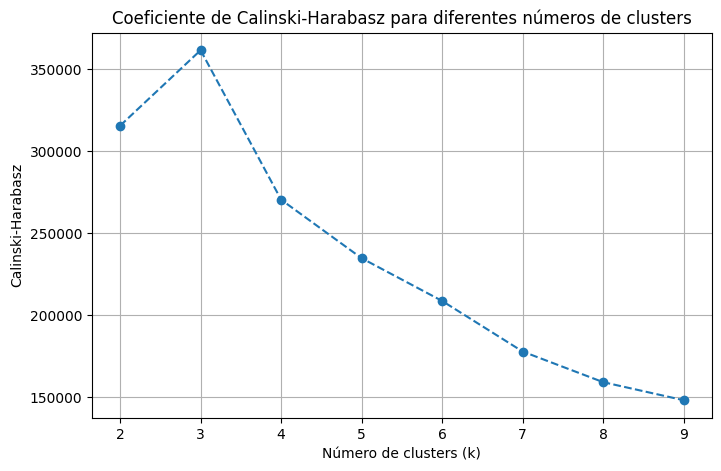

In [57]:
calinski_scores = []

# Probamos diferentes números de clusters (k)
rango_clusters = range(2, 10)
for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_cluster_mayores)
    score = calinski_harabasz_score(datos_cluster_mayores, kmeans.labels_)
    calinski_scores.append(score)

# Graficamos el coeficiente de Calinski-Harabasz
plt.figure(figsize=(8, 5))
plt.plot(rango_clusters, calinski_scores, marker='o', linestyle='--')
plt.title("Coeficiente de Calinski-Harabasz para diferentes números de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Calinski-Harabasz")
plt.grid()
plt.show()

El k ideal segun el metodo del codo y el Calinski Score es 4.

In [58]:
# Aplicamos K-Means con k=4 al dataset
kmeans_mayores = KMeans(n_clusters=4, random_state=42)
kmeans_mayores.fit(datos_cluster_mayores)

# Asignamos las etiquetas de los clusters al dataset original
df_mayores['subcluster'] = kmeans_mayores.labels_
datos_cluster_mayores['subcluster'] = kmeans_mayores.labels_

print("Datos con etiquetas de cluster asignadas:")
print(df_menores.info())

Datos con etiquetas de cluster asignadas:
<class 'pandas.core.frame.DataFrame'>
Index: 837613 entries, 0 to 1833330
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   edad                            837613 non-null  int64  
 1   ingresos_anuales                837613 non-null  int64  
 2   cantidad_compras                837613 non-null  int64  
 3   valor_promedio_compra           837613 non-null  int64  
 4   frecuencia_compras_mensual      837613 non-null  float64
 5   dispositivo_utilizado           837613 non-null  object 
 6   fuente_trafico                  837613 non-null  object 
 7   dias_desde_ultima_compra        837613 non-null  int64  
 8   valor_total_gastado             837613 non-null  int64  
 9   satisfaccion_cliente            837613 non-null  float64
 10  metodo_pago                     837613 non-null  object 
 11  participacion_programa_lealtad  837613 n

<ipython-input-58-1b1aefc2a7fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mayores['subcluster'] = kmeans_mayores.labels_


In [59]:
# Resumimos los datos por cada cluster
resumen_clusters = df_mayores.select_dtypes(include=['float64', 'int64', 'int32']).groupby('subcluster').mean()

print("Resumen de los clusters:")
print(resumen_clusters)

Resumen de los clusters:
                 edad  ingresos_anuales  cantidad_compras  \
subcluster                                                  
0           34.391522      84585.235525         13.002672   
1           34.383224      84617.901292         13.051946   
2           44.500964     160092.026438         34.515505   
3           25.981287      37465.101389         24.080493   

            valor_promedio_compra  frecuencia_compras_mensual  \
subcluster                                                      
0                      447.457585                    6.525572   
1                      447.787248                    6.531916   
2                      124.521544                   10.994357   
3                      273.903757                   10.000494   

            dias_desde_ultima_compra  valor_total_gastado  \
subcluster                                                  
0                          36.658314          6452.232442   
1                          36.7004

<ipython-input-60-f1e3011c8a0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subcluster', y=variable, data=df_mayores, palette='viridis', ax=axes[i])
<ipython-input-60-f1e3011c8a0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subcluster', y=variable, data=df_mayores, palette='viridis', ax=axes[i])
<ipython-input-60-f1e3011c8a0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subcluster', y=variable, data=df_mayores, palette='viridis', ax=axes[i])
<ipython-input-60-f1e3011c8a0c>:11: FutureWarning: 

Passing `palette` wi

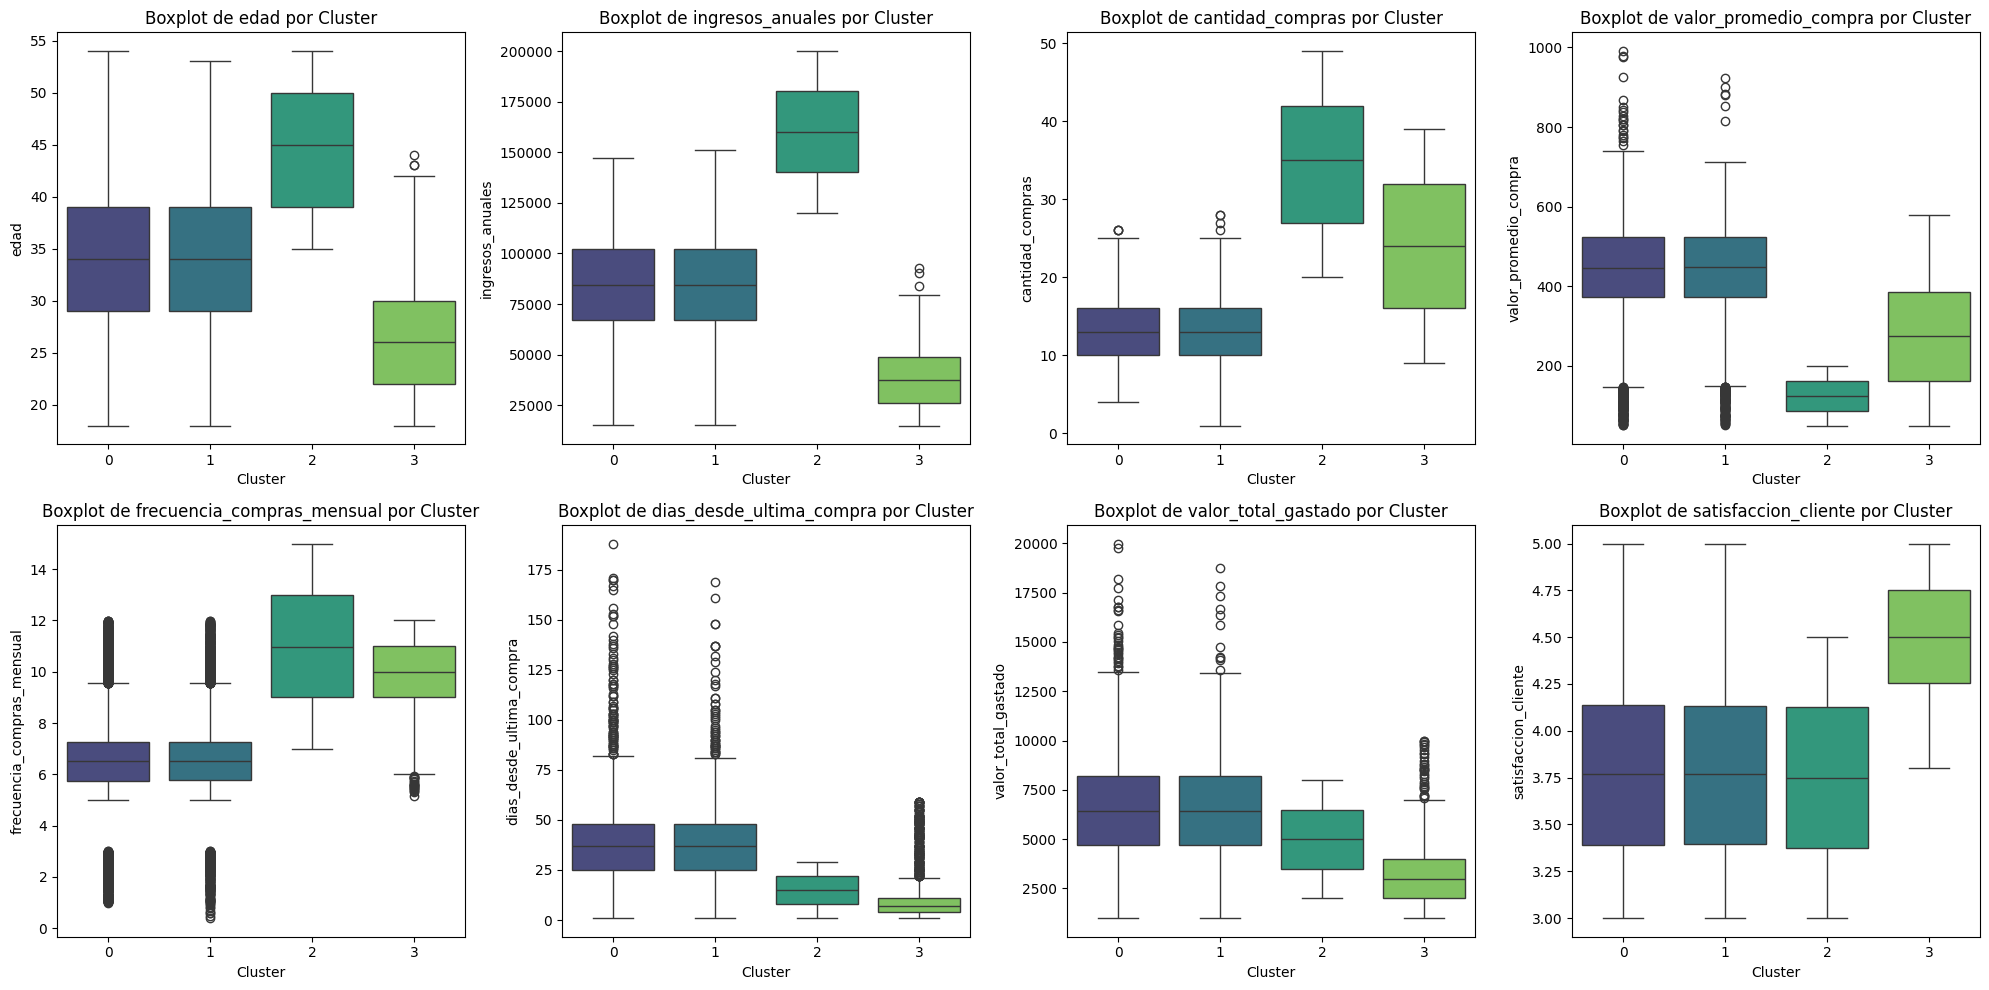

In [60]:
variables_numericas = ['edad', 'ingresos_anuales', 'cantidad_compras',
                       'valor_promedio_compra', 'frecuencia_compras_mensual',
                       'dias_desde_ultima_compra', 'valor_total_gastado',
                       'satisfaccion_cliente']

# Boxplots para variables numéricas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, variable in enumerate(variables_numericas):
    sns.boxplot(x='subcluster', y=variable, data=df_mayores, palette='viridis', ax=axes[i])
    axes[i].set_title(f"Boxplot de {variable} por Cluster")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(variable)

for j in range(len(variables_numericas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [61]:
# Lista de variables categóricas a analizar
variables_categoricas = ['dispositivo_utilizado', 'fuente_trafico',
                         'metodo_pago', 'participacion_programa_lealtad',
                         'productos_adquiridos']

# Crear un resumen de las variables categóricas por cluster
resumen_categorico = {}
for var in variables_categoricas:
    resumen_categorico[var] = df_mayores.groupby('subcluster')[var].value_counts(normalize=True)

# Convertir a DataFrame para facilitar la lectura
for var, data in resumen_categorico.items():
    print(f"Distribución por cluster para {var}:\n")
    print(data.unstack())  # Desapila para una vista más clara
    print("\n")

Distribución por cluster para dispositivo_utilizado:

dispositivo_utilizado        PC     móvil    tablet
subcluster                                         
0                      0.196214  0.707107  0.096679
1                      0.191479  0.710184  0.098338
2                      0.251750  0.498206  0.250044
3                      0.199206  0.800771  0.000022


Distribución por cluster para fuente_trafico:

fuente_trafico  búsqueda orgánica  redes sociales
subcluster                                       
0                        0.397629        0.602371
1                        0.395595        0.604405
2                        0.500700        0.499300
3                        0.199071        0.800929


Distribución por cluster para metodo_pago:

metodo_pago    paypal  tarjeta crédito  transferencia
subcluster                                           
0            0.999451              NaN       0.000549
1                 NaN         0.999988       0.000012
2            0.401059  

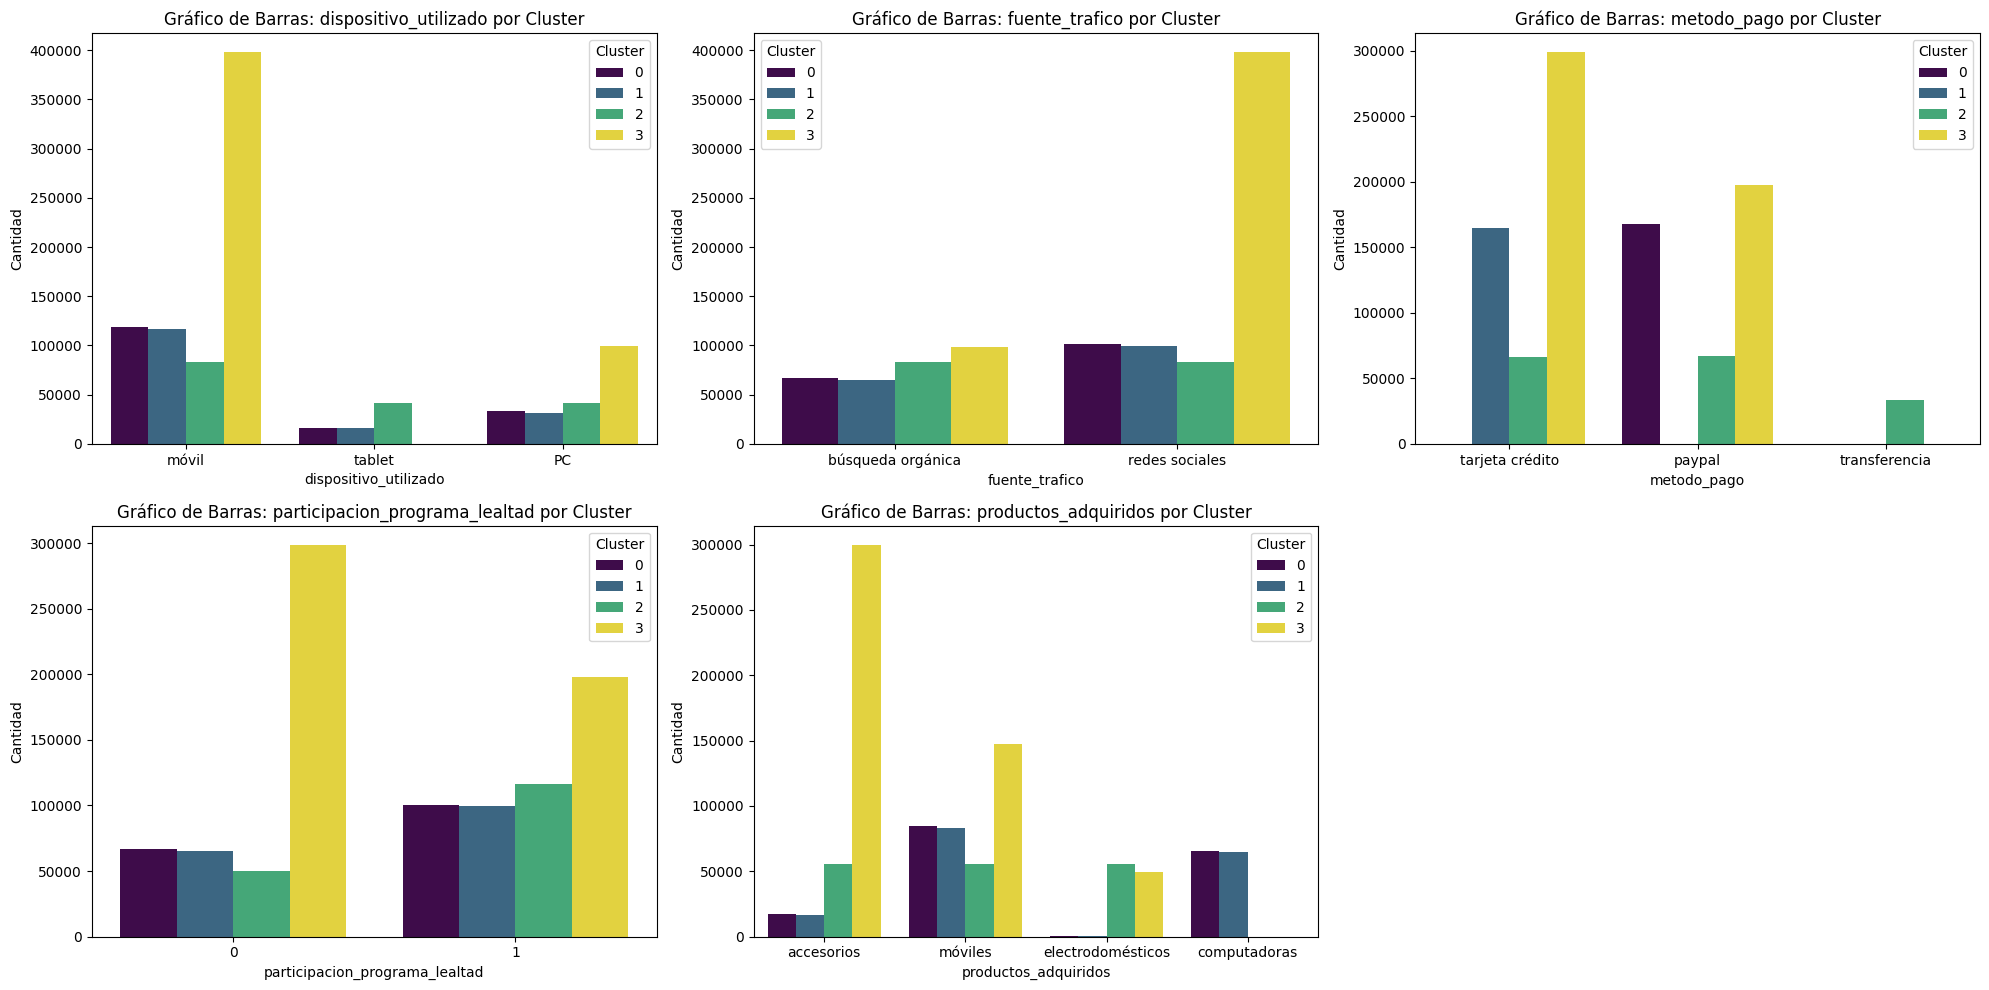

In [62]:
# Gráficos de barras para variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, variable in enumerate(variables_categoricas):
    sns.countplot(x=variable, hue='subcluster', data=df_mayores, palette='viridis', ax=axes[i])
    axes[i].set_title(f"Gráfico de Barras: {variable} por Cluster")
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel("Cantidad")
    axes[i].legend(title="Cluster")

for j in range(len(variables_categoricas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Interpretacion Sub-Clusters

#### Cluster 0 - Compradores dinámicos y digitales

**Subcluster 0 (Edad promedio: 26 años | Ingreso anual: 37533)**
Este grupo representa a los compradores más jóvenes del Cluster 0, caracterizados por su ritmo acelerado y alta interacción con la marca. Realizan 24 compras al mes, con casi 10 transacciones mensuales, lo que los convierte en compradores frecuentes e impulsivos. Su gasto promedio por transacción es de 274, acumulando un total mensual de 3003. Utilizan predominantemente dispositivos móviles (80 %) y confían en las redes sociales (80 %) como su principal fuente de inspiración para comprar. Esto refleja una fuerte conexión con tendencias y productos de fácil acceso, siendo los accesorios (60 %) y los móviles (30 %) sus categorías favoritas. A pesar de estar altamente satisfechos (4.5), solo un 39.6 % participa en programas de lealtad, lo que deja espacio para estrategias dirigidas a fomentar un mayor compromiso con la marca.

**Subcluster 1 (Edad promedio: 34 años | Ingreso anual: 84748)**
Este subgrupo está compuesto por compradores adultos jóvenes que combinan dinamismo con un enfoque más equilibrado en sus decisiones. Compran 13 veces al mes, con 6.5 transacciones mensuales, pero destacan por un gasto promedio elevado de 448 por compra, alcanzando un total mensual de 6463. Prefieren productos más relevantes como móviles (50 %) y computadoras (39 %), lo que indica un interés por bienes de mayor valor. Aunque los dispositivos móviles lideran su uso (70 %), las tabletas (10 %) tienen una presencia significativa, mostrando cierto grado de sofisticación tecnológica. Este grupo no solo confía en redes sociales (60 %), sino que también emplea búsquedas orgánicas (40 %) para investigar antes de comprar. Con una satisfacción moderada (3.76) y un 60.8 % de participación en programas de lealtad, este subcluster tiene gran potencial para campañas que destaquen exclusividad y beneficios para compradores selectivos.

**Subcluster 2 (Edad promedio: 44 años | Ingreso anual: 160068)**
El perfil de este subgrupo incluye a consumidores maduros con el ingreso anual más alto dentro del Cluster 0. Realizan un promedio de 35 compras al mes, con 11 transacciones mensuales, pero su gasto promedio por compra es el más bajo (125), totalizando 4994 al mes. Esto sugiere un patrón de compras recurrentes y diversificado. Este grupo equilibra el uso de dispositivos: móviles (50 %), PC (25 %) y tabletas (25 %), reflejando flexibilidad tecnológica. Sus fuentes de tráfico están equilibradas entre redes sociales y búsquedas orgánicas (50 % cada una), indicando una estrategia híbrida en su interacción digital. Adquieren una variedad de productos en proporciones similares: accesorios, electrodomésticos y móviles (33 % cada uno). Con una alta participación en programas de lealtad (69.9 %) pero una satisfacción moderada (3.75), este subgrupo representa una oportunidad para personalizar ofertas y mejorar la experiencia del cliente.

#### Cluster 1 - Compradores reflexivos y tradicionales

**Subcluster 0 (Edad promedio: 29 años | Ingreso anual: 119849)**
Este grupo es el más joven dentro del Cluster 1, pero, a pesar de sus altos ingresos, tienen un comportamiento de compra relativamente pasivo. Realizan 2.5 compras al mes, con una frecuencia mensual baja (0.6 transacciones) y un gasto promedio de 203 por compra, que suma un total mensual de 2551. Confían principalmente en tabletas (40 %) y redes sociales (59 %) como canal de inspiración, seguido por email marketing (40 %). Adquieren productos en proporciones similares: accesorios, computadoras y móviles. Su satisfacción es baja (2.75), y solo un 29.9 % participa en programas de lealtad, lo que indica que se necesita un enfoque renovado para captar su interés y mejorar su experiencia.

**Subcluster 1 (Edad promedio: 54 años | Ingreso anual: 105577)**
Este perfil incluye a consumidores mayores que realizan 3.5 compras al mes, con una frecuencia mensual de 1 transacción. Destacan por su gasto promedio elevado de 998 por compra, acumulando 18058 al mes. Prefieren bienes como electrodomésticos (71 %) y computadoras (19 %). Usan principalmente PC (59 %) y confían en email marketing (71 %) como su canal principal. La satisfacción promedio es moderada (3.23) y su participación en programas de lealtad alcanza el 61.9 %, lo que sugiere que una comunicación detallada y beneficios exclusivos podrían fortalecer aún más su vínculo con la marca.

**Subcluster 2 (Edad promedio: 64 años | Ingreso anual: 20832)**
Este grupo de consumidores mayores tiene el ingreso más bajo dentro del Cluster 1, pero realizan más compras (5 al mes) y tienen una frecuencia mensual de 1.25 transacciones. Con un gasto promedio de 254 por compra, suman un total mensual de 3061. Sus intereses principales son los electrodomésticos (34 %) y las computadoras (33 %). Utilizan principalmente PC (69 %) y confían en búsquedas orgánicas (59 %) para tomar decisiones. Su satisfacción es moderada (3.00), y su participación en programas de lealtad es baja (19.9 %), lo que representa una oportunidad para diseñar estrategias que los conecten mejor con la marca.

**Subcluster 3 (Edad promedio: 39 años | Ingreso anual: 66755)**
Este grupo de compradores adultos realiza 6.4 compras al mes, con una frecuencia mensual de 2 transacciones. Con un gasto promedio de 647 por compra, acumulan un total mensual de 12319. Prefieren computadoras (59 %) y electrodomésticos (31 %) como sus principales productos. Usan principalmente PC (89 %) y se apoyan en búsquedas orgánicas (79 %) como fuente clave de información antes de comprar. Su satisfacción es relativamente alta (3.96), y el 39.6 % participa en programas de lealtad, lo que indica que todavía hay oportunidades para mejorar su fidelidad a través de beneficios atractivos y personalizados.

#### Interpretación general
Los subclusters del Cluster 0 presentan un perfil predominantemente joven y digital, con comportamientos de compra frecuentes e impulsivos impulsados por móviles y redes sociales. Por otro lado, los subclusters del Cluster 1 son más reflexivos, priorizando dispositivos tradicionales como PC y tabletas, y toman decisiones basadas en investigación previa a través de búsquedas orgánicas y email marketing. Mientras el Cluster 0 enfatiza la conveniencia y productos accesibles, el Cluster 1 está orientado a compras más planificadas y de mayor valor. Cada grupo ofrece oportunidades únicas para personalizar campañas y mejorar la conexión con la marca.


In [63]:
# Combinamos los DataFrames verticalmente
datos_cluster_mayores['subcluster'] += df_menores['subcluster'].max() + 1
df_combinado_procesado = pd.concat([datos_cluster_mayores, datos_cluster_menores], axis=0)

## Arbol de Decisión con Subgrupos

In [68]:
df_combinado_procesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1833331 entries, 1 to 1833330
Data columns (total 23 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   edad                                    float64
 1   ingresos_anuales                        float64
 2   cantidad_compras                        float64
 3   valor_promedio_compra                   float64
 4   frecuencia_compras_mensual              float64
 5   dias_desde_ultima_compra                float64
 6   valor_total_gastado                     float64
 7   satisfaccion_cliente                    float64
 8   participacion_programa_lealtad          int64  
 9   dispositivo_utilizado_PC                float64
 10  dispositivo_utilizado_móvil             float64
 11  dispositivo_utilizado_tablet            float64
 12  fuente_trafico_búsqueda orgánica        float64
 13  fuente_trafico_email                    float64
 14  fuente_trafico_redes sociales          

Distribución de los clusters:
subcluster
6    0.270928
0    0.270363
1    0.093377
2    0.093140
3    0.091467
5    0.090778
4    0.089946
Name: count, dtype: float64


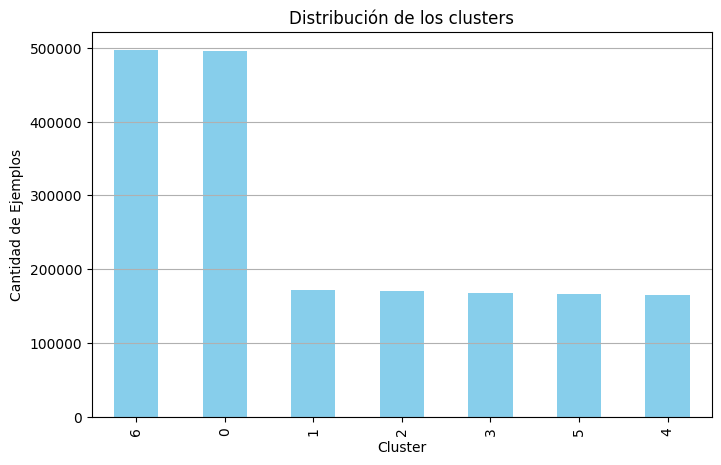

In [69]:
balance = df_combinado_procesado['subcluster'].value_counts()

print("Distribución de los clusters:")
print(balance/df_procesado['cluster'].size)

# Graficar el balance de los datos
plt.figure(figsize=(8, 5))
balance.plot(kind='bar', color='skyblue')
plt.title("Distribución de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Ejemplos")
plt.grid(axis='y')
plt.show()

Se observa un desbalance significativo entre los subclusters, por lo que se procede a generar sintéticamente datos de los subclústeres más pequeños utilizando SMOTE.

In [70]:
smote = SMOTE(random_state=42)

# Aplicamos SMOTE al dataset
X_resampled, y_resampled = smote.fit_resample(df_combinado_procesado.drop('subcluster', axis=1), df_combinado_procesado['subcluster'])

# Verificamos el nuevo balance
print("Distribución después de SMOTE:", Counter(y_resampled))

Distribución después de SMOTE: Counter({4: 496701, 6: 496701, 3: 496701, 5: 496701, 2: 496701, 0: 496701, 1: 496701})


In [71]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print("Distribución en entrenamiento:")
print(pd.Series(y_train_sub).value_counts(normalize=True))
print("\nDistribución en prueba:")
print(pd.Series(y_test_sub).value_counts(normalize=True))

Distribución en entrenamiento:
subcluster
1    0.142981
3    0.142901
0    0.142900
5    0.142895
2    0.142828
6    0.142817
4    0.142678
Name: proportion, dtype: float64

Distribución en prueba:
subcluster
4    0.143275
6    0.142950
2    0.142925
5    0.142769
0    0.142757
3    0.142755
1    0.142569
Name: proportion, dtype: float64


In [72]:
X_sample_sub, _, y_sample_sub, _ = train_test_split(
    X_train_sub, y_train_sub,
    test_size=0.9,
    stratify=y_train_sub,
    random_state=42
)

In [ ]:
modelo = tree.DecisionTreeClassifier(random_state=42)

# Definimos el espacio de búsqueda de hiperparámetros
parametros = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=modelo, param_grid=parametros, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_sample_sub, y_sample_sub)

# Mejor modelo
mejores_parametros = grid_search.best_params_
print("Mejores parámetros encontrados:", mejores_parametros)
print("Mejor precisión en validación cruzada:", grid_search.best_score_)

In [ ]:
modelo_final_sub = tree.DecisionTreeClassifier(**mejores_parametros, random_state=42)
modelo_final_sub.fit(X_train_sub, y_train_sub)

In [ ]:
feature_names = X_train_sub.columns

dot_data = export_graphviz(
    modelo_final_sub,
    out_file=None,
    feature_names=feature_names,
    class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
y_pred_sub = modelo_final_sub.predict(X_test_sub)

print("Reporte de clasificación:")
print(classification_report(y_test_sub, y_pred_sub))
print("Precisión en el conjunto de prueba:", accuracy_score(y_test_sub, y_pred_sub))


In [ ]:
matrix = confusion_matrix(y_test_sub, y_pred_sub)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modelo_final_sub.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión")
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_test_sub, y_pred_sub))
print("Precision (macro):", precision_score(y_test_sub, y_pred_sub, average='macro'))
print("Recall (macro):", recall_score(y_test_sub, y_pred_sub, average='macro'))
print("F1-score (macro):", f1_score(y_test_sub, y_pred_sub, average='macro'))

#### Prueba en Datos sin SMOTE

In [ ]:
_, X_test_sin_smote, _, y_test_sin_smote = train_test_split(df_combinado_procesado.drop(['subcluster'], axis = 1), df_combinado_procesado['subcluster'], test_size=0.3, random_state=40)

In [ ]:
y_pred_sin_smote = modelo_final_sub.predict(X_test_sin_smote)

print("Reporte de clasificación:")
print(classification_report(y_test_sin_smote, y_pred_sin_smote))
print("Precisión en el conjunto de prueba:", accuracy_score(y_test_sin_smote, y_pred_sin_smote))

In [ ]:
matrix = confusion_matrix(y_test_sin_smote, y_pred_sin_smote)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modelo_final_sub.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión")
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_test_sin_smote, y_pred_sin_smote))
print("Precision (macro):", precision_score(y_test_sin_smote, y_pred_sin_smote, average='macro'))
print("Recall (macro):", recall_score(y_test_sin_smote, y_pred_sin_smote, average='macro'))
print("F1-score (macro):", f1_score(y_test_sin_smote, y_pred_sin_smote, average='macro'))